<a href="https://colab.research.google.com/github/Arham-Reza/Arham-Reza/blob/main/Titanic_EDA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import of required modules and libraries**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import ConnectionPatch
import seaborn as sns
from scipy import stats
print("Required libraries and modules imported successfully!")

import warnings
warnings.filterwarnings("ignore")
print("Warnings will be ignored")

Required libraries and modules imported successfully!
Warnings will be ignored


# Read Dataset

In [ ]:
df = pd.read_csv("/content/titanic_preprocessed.csv")
df2 = pd.read_csv("/content/titanic_preprocessed2.csv")
print("Data sets imported Successfully!")

Data sets imported Successfully!


# Exploratory Data Analysis (EDA) and Visualizations
**Introduction**

In this section, we are going to visualize the data in hand and also explore the features thoroughly. We will use various hypotheses, wherever and whenever needed. But, most of the part will be based upon plots, graphs and tables.

The EDA part will help to answer some questions about the incident as far as recorded in the given dataset, like -

1 What was the number and percentage of passengers who survived?

2 What percentage of the passengers were male and female?

3 Did the male passenger survived more or the female passengers?

4 Which port saw maximum boarding?
5 How much of the passenger population were children?
and many more.

Each of the features will be analyzed thoroughly and answers to the questions like mentioned above will be discovered.

# Column Modifications
Some modifications are done in the dataset for this section.

**Rename Columns**

In [ ]:
df = df.rename(
        columns = {
            "Pclass" : "PassengerClass",
            "SibSp" : "SiblingSpouse",
 	        "Parch" : "ParentChild"
        }
    )
df2 = df2.rename(
        columns = {
            "Pclass" : "PassengerClass",
            "SibSp" : "SiblingSpouse",
 	        "Parch" : "ParentChild"
        }
    )

# Rename categories in Categorical Attributes

In [ ]:
df["Survived"].replace(
    {
        0 : "No",
        1 : "Yes"
    },
    inplace = True
)

Passenger Class

Old	New
*  1  	1st
*  2  	2nd
*  3	  3rd



In [ ]:
df["PassengerClass"].replace(
    {
        1 : "1st",
        2 : "2nd",
        3 : "3rd"
    },
    inplace = True
)
df2["PassengerClass"].replace(
    {
        1 : "1st",
        2 : "2nd",
        3 : "3rd"
    },
    inplace = True
)

**Sex**

Old	    New

male	  Male

female	Female

In [ ]:
df["Sex"].replace(
    {
        "male" : "Male",
        "female" : "Female"
    },
    inplace = True
)
df2["Sex"].replace(
    {
        "male" : "Male",
        "female" : "Female"
    },
    inplace = True
)

**Old	New**

**S	Southampton**

**C	Cherbourg**

**Q	Queenston**

In [ ]:
df["Embarked"].replace(
    {
        "C" : "Cherbourg",
        "Q" : "Queenstown",
        "S" : "Southampton"
    },
    inplace = True
)
df2["Embarked"].replace(
    {
        "C" : "Cherbourg",
        "Q" : "Queenstown",
        "S" : "Southampton"
    },
    inplace = True
)

# Categorizing Age Column
The Age is a continuous type of data. So we will categorize the column.

But before that, we need to look at the minimum and maximum values attained in the Age column.

In [ ]:
print("Minimum Age : ", min(df["Age"]))
print("Maximum Age : ", max(df["Age"]))

Minimum Age :  0.42
Maximum Age :  80.0


In [ ]:
print("Minimum Age : ", min(df2["Age"]))
print("Maximum Age : ", max(df2["Age"]))

Minimum Age :  0.17
Maximum Age :  76.0


Observing both the datasets, we can categorize the age column as follows :

Range of Age	Categories

0 - 5	Infant

5 - 12	Child

12 - 19	Teenager

19 - 35	Young Adult

35 - 55	Middle Aged

55 - 65	Adult

more than 65	Senior

In [ ]:
df["Age Group"] = pd.cut(
                    df["Age"],
                    bins = [0, 5, 12, 19, 35, 55, 65, 87],
                    right = True,
                    labels = ["Infant", "Child", "Teenager", "Young Adult", "Middle Aged", "Adult", "Senior"]
                  )

df2["Age Group"] = pd.cut(
                    df2["Age"],
                    bins = [0, 5, 12, 19, 35, 55, 65, 87],
                    right = True,
                    labels = ["Infant", "Child", "Teenager", "Young Adult", "Middle Aged", "Adult", "Senior"]
                  )

**Statistical Test**

As most of the anlysis will be done on the columns with categorical type of data, so Chi Square Test of Independence will be used.

**Chi Square Test of Independence**

The Chi-square test of independence is a statistical hypothesis test used to determine whether two categorical variables are liiely to be related or not. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.


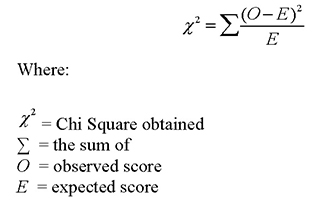
**Survived**

Questions :

1 How many passengers survived?

2 What percentage of the passengers survived?

3 On the basis of the "Survived" column let us define the following -

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>n</mi>
    <mi>d</mi>
  </msub>
</math>

nd= Number of Passengers who died

ns= Number of Passengers who survived
Based on nd and ns, we can test

 Ho: nd < ns against H1 : nd > ns
 
The above test can be proceeded with a basic with the help of a simple bar plot.

Text(0, 0.5, 'Number of Passengers')

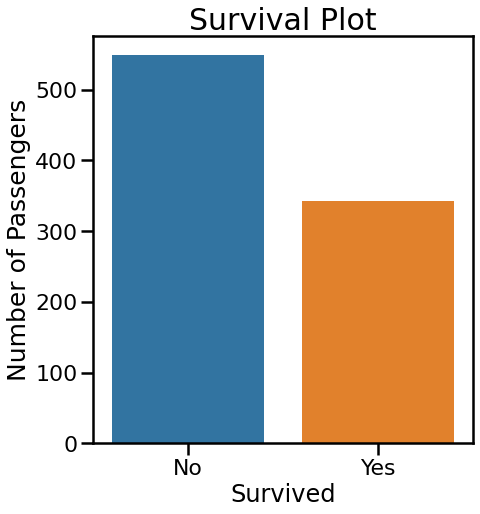

In [ ]:
plt.figure( figsize = [15, 7.5] )
sns.set_context("poster")
plt.subplot(1,2,1)
sns.countplot(
    "Survived",
    data = df
)
plt.title(
    "Survival Plot", 
    fontsize = 30
)
plt.ylabel(
    "Number of Passengers",
    fontsize = 25
)

In [ ]:
countSurvived = 0
countDied = 0
for i in df["Survived"] :
    if i == "Yes" :
        countSurvived = countSurvived + 1
    else :
        countDied = countDied + 1
print("Number of Passengers Survived : ", countSurvived)
print("Number of Passengers Died : ", countDied)

Number of Passengers Survived :  342
Number of Passengers Died :  549


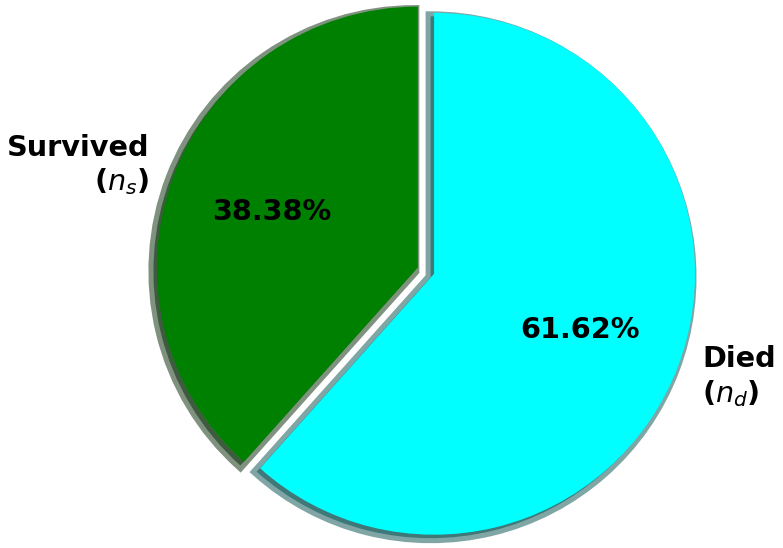

In [ ]:
plt.subplots( figsize = [8, 8] )
plt.pie( 
    [countSurvived, countDied],
    explode = [0.1, 0],
    labels = ["Survived\n($n_s$)", "Died\n($n_d$)"],
    colors = ["green", "cyan"],
    autopct = '%2.2f%%',
    shadow = True,
    startangle = 90,
    radius = 1.5,
    wedgeprops = {"linewidth" : 10},
    textprops = {"fontsize" : "large",
                 "weight" : "bold"}
)
plt.show()

**Sex**
Questions :

1 What was number of Male passengers on board?
2 What was number of Female passengers on board?
3 What was the percentage of Male passengers?
4 What was the percentage of Female passengers?
On the basis of the "Sex" column let,

nm = Number of "male" passengers

nf= Number of "female" passengers

Based on nm and nf it can be tested that,
Ho : nm < nf against H1 : nm > nf

This test can be proceeded by viusalizing with a simple bar plot and hence it can be determined whether **Ho** can be accepted or not.

Text(0, 0.5, 'Number of Passengers')

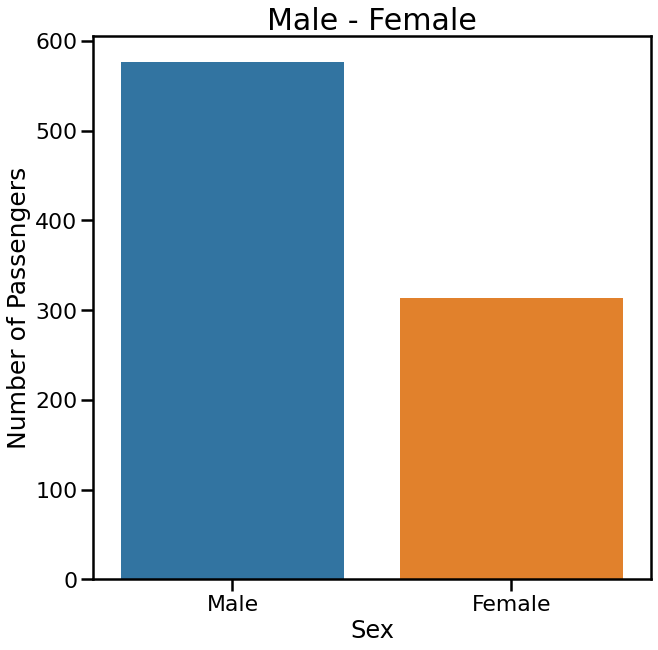

In [ ]:
plt.figure( figsize = [10, 10] )
sns.countplot(
    "Sex",
    data = df
)
plt.title(
    "Male - Female",
    fontsize = 30
)
plt.ylabel(
    "Number of Passengers",
    fontsize = 25
)

Clearly, from the above plot it canbe said that,**Ho** cannot be accepted. Moreover, from the above plot it can be seen that, nf < nm, where

nm -580   nf-320

The actual values of nm and nf are calculated in the following output.

In [ ]:
countMale = 0
countFemale = 0
for i in df["Sex"] :
    if i == "Male" :
        countMale = countMale + 1
    else :
        countFemale = countFemale + 1
print("Number of Male Passengers : ", countMale)
print("Number of Female Passengers : ", countFemale)

Number of Male Passengers :  577
Number of Female Passengers :  314


Finally,

 nm= 577  nf= 314

Hence, **Ho**  failed to be accepted, that is, there were more "male" passengers than "female" passengers.

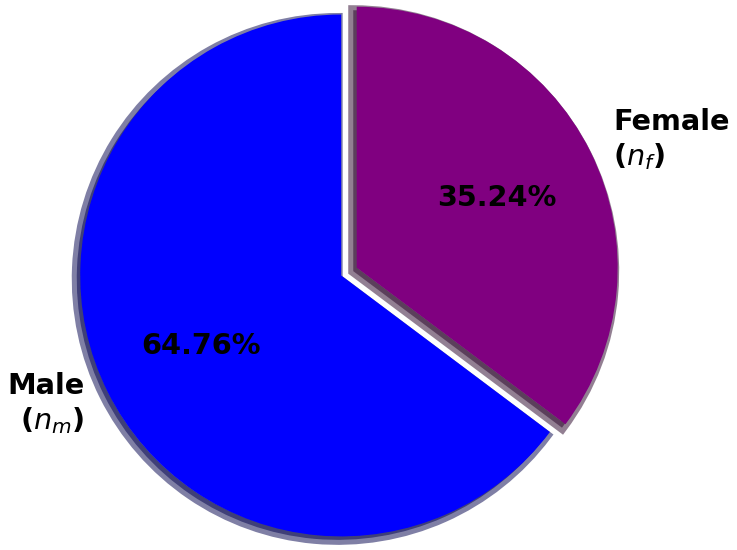

In [ ]:
plt.subplots( figsize = [8, 8] )
plt.pie( 
    [countMale, countFemale],
    explode = [0, 0.1],
    labels = ["Male\n($n_m$)", "Female\n($n_f$)"],
    colors = ["blue", "purple"],
    autopct = '%2.2f%%',
    shadow = True,
    startangle = 90,
    radius = 1.5,
    wedgeprops = {"linewidth" : 10},
    textprops = {"fontsize" : "large",
                 "weight" : "bold"}
)
plt.show()

So, from the Sex column we can summarise the following table -

Sex	Actual Number	Percentage

Male    	577	      64.76%

Female	  314	      35.24%

**Survived - Sex**
Question : Did Sex played a roll in Survival of the passengers?

Here, the number and percentages of the passengers who Survived and Died for each of the two categories of Sex will be calculated.

Clearly the number of Passesngers for the following four cases will have to be calculated :
Case	Survival Status	Sex

1   	Survived	Male

2	     Died	Male

3   	Survived	Female

4	Died	Female

Then the values obtained in each of the above four cases wll be plotted.



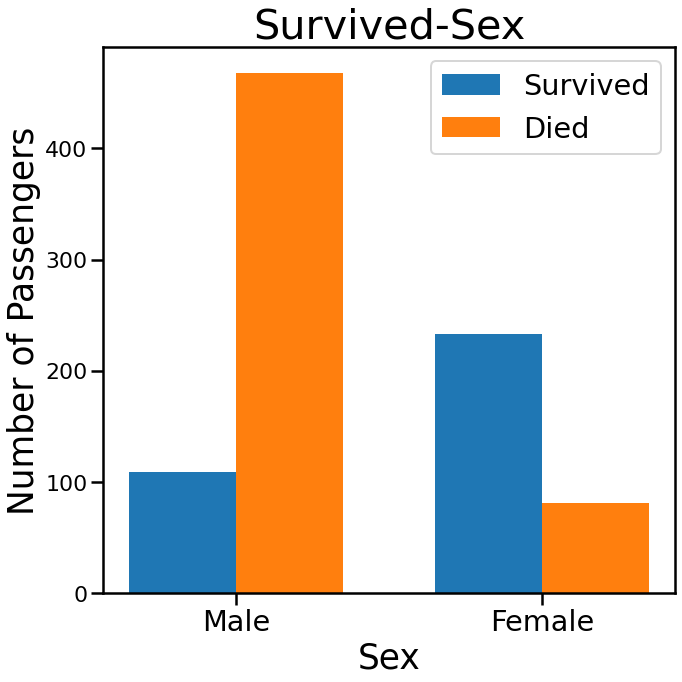

In [ ]:
# Calculate the number of Passesngers
count_sm = df["Survived"][df["Survived"] == "Yes"][df["Sex"] == "Male"].count()
count_dm = df["Survived"][df["Survived"] == "No"][df["Sex"] == "Male"].count()
count_sf = df["Survived"][df["Survived"] == "Yes"][df["Sex"] == "Female"].count()
count_df = df["Survived"][df["Survived"] == "No"][df["Sex"] == "Female"].count()

# Plot the result of the six cases
labels = ["Male", "Female"]
survived = [count_sm, count_sf]
died = [count_dm, count_df]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = [10, 10])
plot1 = ax.bar(
            x - width/2,
            survived,
            width,
            label = "Survived"
        )
plot2 = ax.bar(
            x + width/2,
            died,
            width,
            label = "Died"
        )

ax.set_title(
    "Survived-Sex", 
    size = "xx-large"
)

ax.set_ylabel(
    "Number of Passengers", 
    size = "x-large"
)

ax.set_xlabel(
    "Sex", 
    size = "x-large"
)

ax.set_xticks(x)

ax.set_xticklabels(
    labels, 
    size = "large"
)

ax.legend(fontsize = "large")
fig.tight_layout()
plt.show()


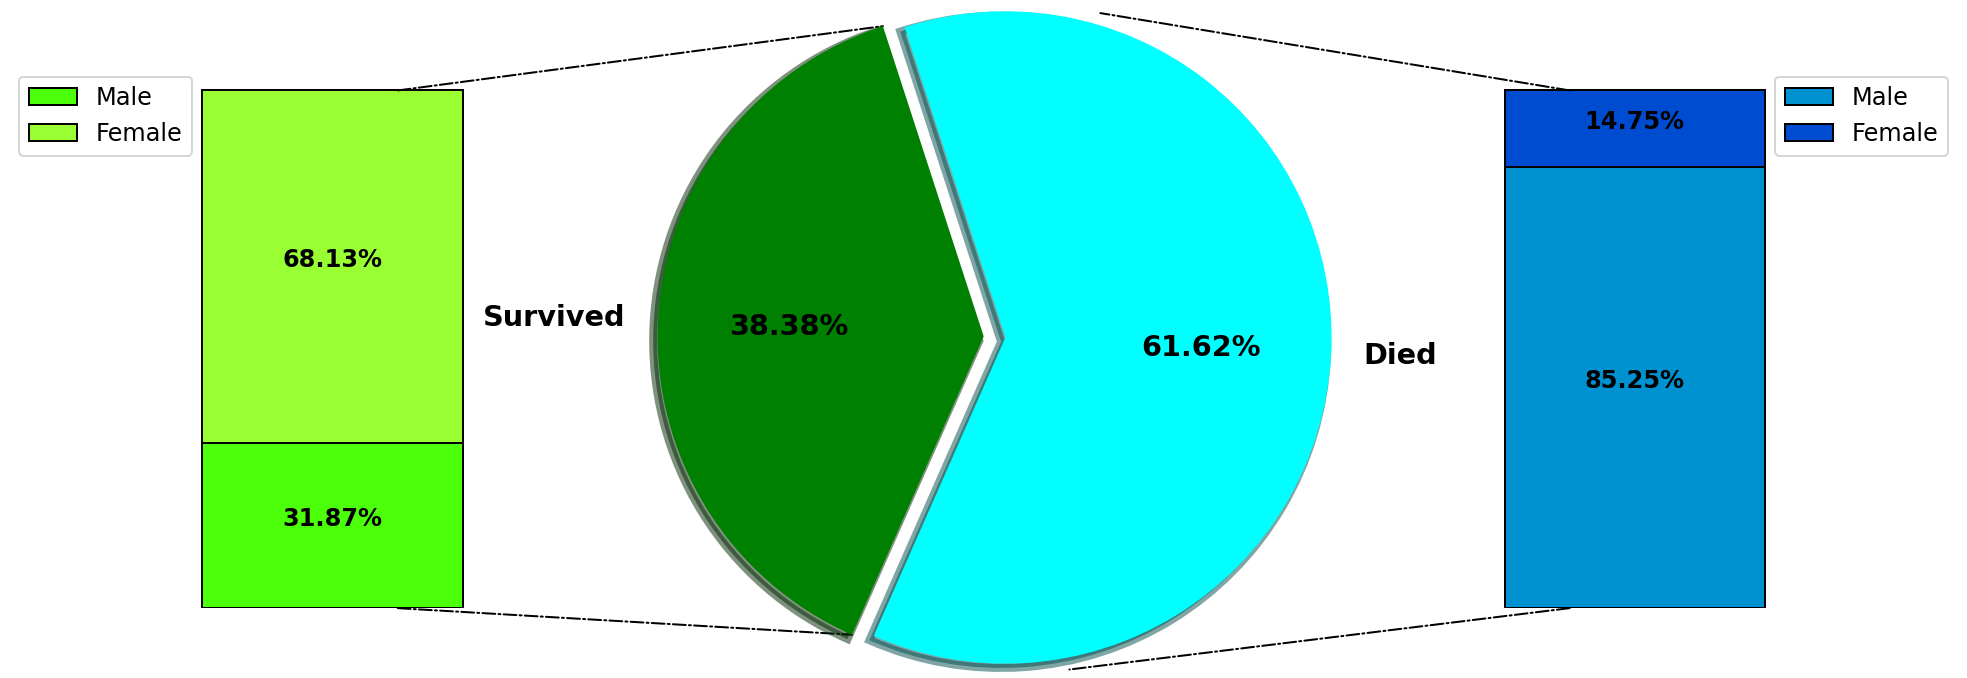

In [ ]:
fig, (survivedBar, totalPie, diedBar) = plt.subplots(1, 3, figsize = (35,10))
fig.subplots_adjust(wspace = 0)


# 1. Creating Pie chart with total Survived and total Died
totalPie.pie( 
    [sum(survived), sum(died)],
    explode = [0, 0.1],
    labels = ["Survived", "Died"],
    colors = ["green", "cyan"],
    autopct = '%2.2f%%',
    shadow = True,
    startangle = 108,
    radius = 1.5,
    wedgeprops = {"linewidth" : 8},
    textprops = {"fontsize" : "large",
                 "weight" : "bold"}
)


# 2. Creating Bar chart based on the Survived Data

# 2.1. Creating Bar chart on Survived Male
survivedBar.bar(
    x = "Survived",
    height = survived[0],
    width = 0.2,
    bottom = 0,
    label = "Male",
    align = "center",
    edgecolor  ="black",
    color = "#4CFF0A"
)
survivedBar.text(
    x = 0,
    y = survived[0]/2,
    s = str(np.round(survived[0] * 100/sum(survived), 2))+"%",
    ha = "center",
    weight = "bold"
)

# 2.2. Creating Bar chart on Survived Female
survivedBar.bar(
    x = "Survived",
    height = survived[1],
    width = 0.2,
    bottom = survived[0],
    label = "Female",
    align = "center",
    edgecolor = "black",
    color = "#99FF33"
)
survivedBar.text(x = 0,
    y = survived[0] + survived[1]/2,
    s = str(np.round(survived[1] * 100/sum(survived), 2))+"%",
    ha = "center",
    weight = "bold"
)

# 2.3. Fix the axis of the bars
survivedBar.axis(
    xmin = -2.5 * 0.1,
    xmax = 2.5 * 0.1
)
survivedBar.axis("off")

# 2.4. Customise the legend
survivedBar.legend(
    labels = ("Male", "Female"),
    loc = "upper left",
    fontsize = "medium"
)
# 3. Line from Pie to Survived Bar
# Here, ConnectionPatch is used to draw lines between two plots

# 3.1. Get the wedge data
theta1 = totalPie.patches[0].theta1
theta2 = totalPie.patches[0].theta2
center = totalPie.patches[0].center
radius = totalPie.patches[0].r
bar_height = sum(item.get_height() for item in survivedBar.patches)

# 3.2. Top Connecting Line
x = radius * np.cos(np.pi / 180 * theta1) + center[0]
y = radius * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(
        xyA = (0.1/2, bar_height),
        coordsA = survivedBar.transData,
        xyB = (x , y),
        coordsB = totalPie.transData
    )
con.set_color([0, 0, 0])
survivedBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")

# 3.3. Bottom Connecting Line
x = radius * np.cos(np.pi / 180 * theta2) - center[0]
y = radius * np.sin(np.pi / 180 * theta2) - center[1]
con = ConnectionPatch(
        xyA = (0.1/2, 0),
        coordsA = survivedBar.transData,
        xyB = (x, y),
        coordsB = totalPie.transData
    )
con.set_color([0, 0, 0])
survivedBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")


# 4. Creating Bar chart based on the Died Data

# 4.1. Creating Bar chart on Died Male
diedBar.bar(
    x = "Died",
    height = died[0],
    width = 0.2,
    bottom = 0,
    label = "Male",
    align = "center",
    edgecolor = "black",
    color = "#0091D0"
)
diedBar.text(
    x = 0,
    y = died[0]/2,
    s = str(np.round(died[0] * 100/sum(died), 2))+"%",
    ha = "center",
    weight = "bold"
)
# 4.2. Creating Bar chart on Died Female
diedBar.bar(
    x = "Died",
    height = died[1],
    width = 0.2,
    bottom = died[0],
    label = "Female",
    align = "center",
    edgecolor = "black",
    color = "#004CD0"
)
diedBar.text(
    x = 0,
    y = died[0] + died[1]/2,
    s = str(np.round(died[1] * 100/sum(died), 2))+"%",
    ha = "center",
    weight = "bold"
)

# 4.3. Fix the axis of the bars
diedBar.axis(
    xmin = -2.5 * 0.1,
    xmax = 2.5 * 0.1
)
diedBar.axis("off")

# 4.4. Customise the legend
diedBar.legend(
    labels = ("Male", "Female"),
    loc = "upper right",
    fontsize = "medium"
)

# 5. Line from Pie to Died Bar
# ConnectionPatch is used to draw lines between two plots

# 5.1. Get the wedge data
theta1 = totalPie.patches[0].theta1
theta2 = totalPie.patches[0].theta2
center = totalPie.patches[0].center
radius = totalPie.patches[0].r
bar_height = sum(item.get_height() for item in diedBar.patches)

# 5.2. Top Connecting Line
x = radius * np.cos(np.pi / 180 * theta1) + center[0]
y = radius * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(
        xyA = (-0.1/2, bar_height),
        coordsA = diedBar.transData,
        xyB = (x + 1, y + 0.06),
        coordsB = totalPie.transData
    )
con.set_color([0, 0, 0])
diedBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")

# 5.3. Bottom Connecting Line
x = radius * np.cos(np.pi / 180 * theta2) + center[0]
y = radius * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(
        xyA = (-0.1/2, 0),
        coordsA = diedBar.transData,
        xyB = (x + 1, y - 0.16),
        coordsB = totalPie.transData
    )
con.set_color([0, 0, 0])
diedBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")

# 6. Final Output
plt.show()

The above two plots show that, most of the female passengers survived, or in the other words, most of the male passengers died.

But, to answer the question statistically, let us consider the following hypothese :

 Ho: Sex played no roll in Survival of the passengers vs H1 : Sex played a significant roll in Survival of the passengers
For this, we will use the Chi Square Test.

In [ ]:
surv_sex = pd.crosstab(
                [df["Survived"]],
                [df["Sex"]]
            )
chi2, p, dof, ex = stats.chi2_contingency(surv_sex)
pd.DataFrame(
    data = [round(chi2, 3),round(p, 4)],
    columns = ["Value"],
    index = ["Chi Square", "p-value"]
)

,Value
Chi Square,260.717
p-value,0.000


As p-value < 0.05, so the probability that sex played role in survival is high. Thus, we can reject the null hypothesis.

The exact values of each of the four cases considered are shown in the following output.

In [ ]:
surv_sex.style.background_gradient(
    cmap = "cividis"
)

Sex,Female,Male
Survived,,
No,81,468
Yes,233,109


Hence, Sex played an important role in Survival of a passenger.

Passenger Class
Question : Which passeger class had maximum number of passengers?

There are 3 unique values in the "Passenger Class" column.

Let,

 c1: Number of passengers with 1st Class ticket

 c2: Number of passengers with 2nd Class ticket

 c3: Number of passengers with 3rd Class ticket
 
 c1,c2  and c3 can be visualized with the following plot.

Text(0, 0.5, 'Number of Passengers')

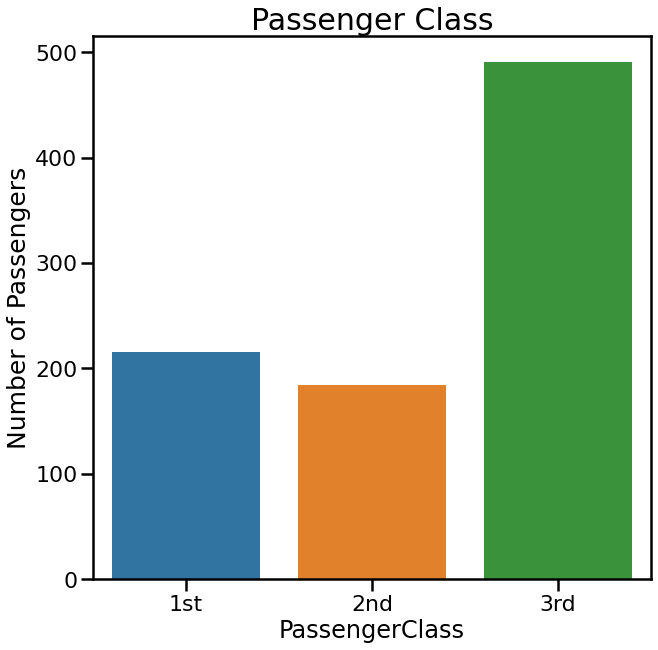

In [ ]:
plt.figure( figsize = [10, 10] )
sns.set_context("poster")
plt.title(
    "Passenger Class", 
    fontsize = 30
)
sns.countplot(
    "PassengerClass",
    data = df,
    order = ["1st", "2nd", "3rd"]
)
plt.ylabel(
    "Number of Passengers",
    fontsize = 25
)

From the above plot, it can be said that :

  c1=210

  c2=190

  c3=490
  Now, we will obtain the exact values of c1,c2 and c3 .

In [ ]:
count1 = 0
count2 = 0
count3 = 0
for i in df["PassengerClass"] :
    if i == "1st" :
        count1 += 1
    elif i == "2nd" :
        count2 += 1
    else :
        count3 += 1
print("Number of Passengers travelling in 1st class : ", count1)
print("Number of Passengers travelling in 2nd class : ", count2)
print("Number of Passengers travelling in 3rd class : ", count3)

Number of Passengers travelling in 1st class :  216
Number of Passengers travelling in 2nd class :  184
Number of Passengers travelling in 3rd class :  491


Hence, the number of passengers in each passenger classes obtained are shown below :

Passenger Class	Number of Passengers

1st Class	216

2nd Class	184

3rd Class	491

The percentage of passengers in each passenger class is shown in the following plot.

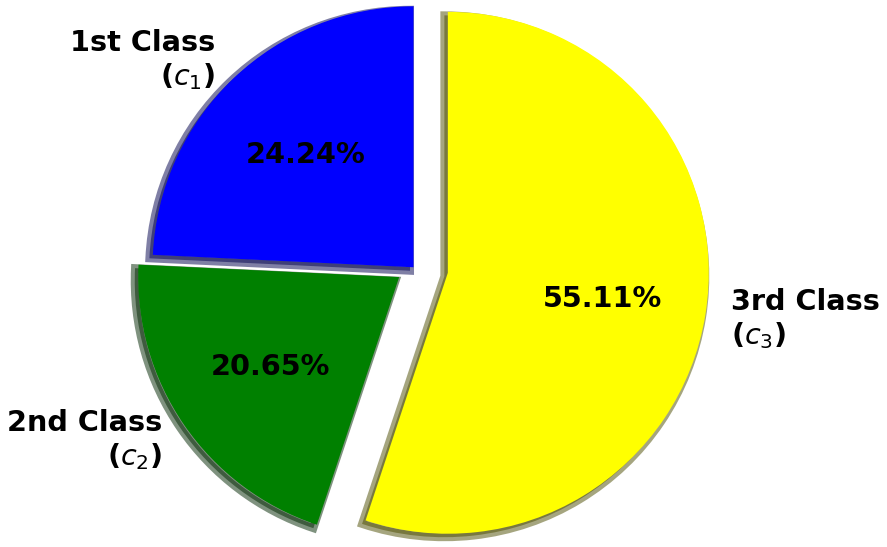

In [ ]:
plt.subplots( figsize = [8, 8] )
plt.pie( 
    [count1, count2, count3],
    explode = [0, 0.1, 0.2],
    labels = ["1st Class\n($c_1$)", "2nd Class\n($c_2$)", "3rd Class\n($c_3$)"],
    colors = ["blue", "green", "yellow"],
    autopct = '%2.2f%%',
    shadow = True,
    startangle = 90,
    radius = 1.5,
    wedgeprops = {"linewidth" : 8},
    textprops = {"fontsize" : "large",
                 "weight" : "bold"}
)
plt.show()

Based on the above outcomes, the following can be said :

* Arranging in an non-increasing order we get,c3 ,c1 ,c2 .



* Maximum number of Passengers were travelling with a 3rd class ticket, i.e, 55.11%.

* Minimum number of Passengers were travelling with a 2nd class ticket, i.e, 20.65%.

**Passenger Class - Sex**

Questions :

1 What are the sex ratios of each Passenger Class?

2 What percentages of each Passenger Class is present in each of the Male ppopulation and Female population?
Sex Ratio is the ratio of males to females in a population.

First, the number of male passengers and female passengers in each of the three Passenger classes will be calculated. Clearly we will have to calculate the number of passesngers for the following six cases :

Case	Sex	Class

1	Male	1st Class

2	Female	1st Class

3	Male	2nd Class

4	Female	2nd Class

5	Male	3rd Class

6	Female	3rd Class

Then the sex ratio for each of the Passenger Class will be calculated and shown in the following output.


In [ ]:
# Calculate the number of Passesngers
count_1m = 0 # Case 1
count_1f = 0 # Case 2
count_2m = 0 # Case 3
count_2f = 0 # Case 3
count_3m = 0 # Case 5
count_3f = 0 # Case 6

j = 0
for i in df["Sex"] :
    if i == "Male" :
        if df["PassengerClass"][j] == "1st" :
            count_1m += 1
        elif df["PassengerClass"][j] == "2nd" :
            count_2m += 1
        else :
            count_3m += 1
    else : # i == "female"
        if df["PassengerClass"][j] == "1st" :
            count_1f += 1
        elif df["PassengerClass"][j] == "2nd" :
            count_2f += 1
        else :
            count_3f += 1
    j += 1
pd.DataFrame(
    data = {"Male" : [count_1m, count_2m, count_3m, (count_1m+count_2m+count_3m)],
            "Female" : [count_1f, count_2f, count_3f, (count_1f+count_2f+count_3f)],
            "Sex Ratio" : [count_1m/count_1f,
                           count_2m/count_2f,
                           count_3m/count_3f,
                           (count_1m+count_2m+count_3m)/(count_1f+count_2f+count_3f)]},
    index = ["1st Class", "2nd Class", "3rd Class", "Total"]
).style.background_gradient(
    cmap = "PuOr",
    axis = 0
)

,Male,Female,Sex Ratio
1st Class,122,94,1.297872
2nd Class,108,76,1.421053
3rd Class,347,144,2.409722
Total,577,314,1.837580


All over sex ratio was 1.837580.

The above insight can also be gained from the following plot.

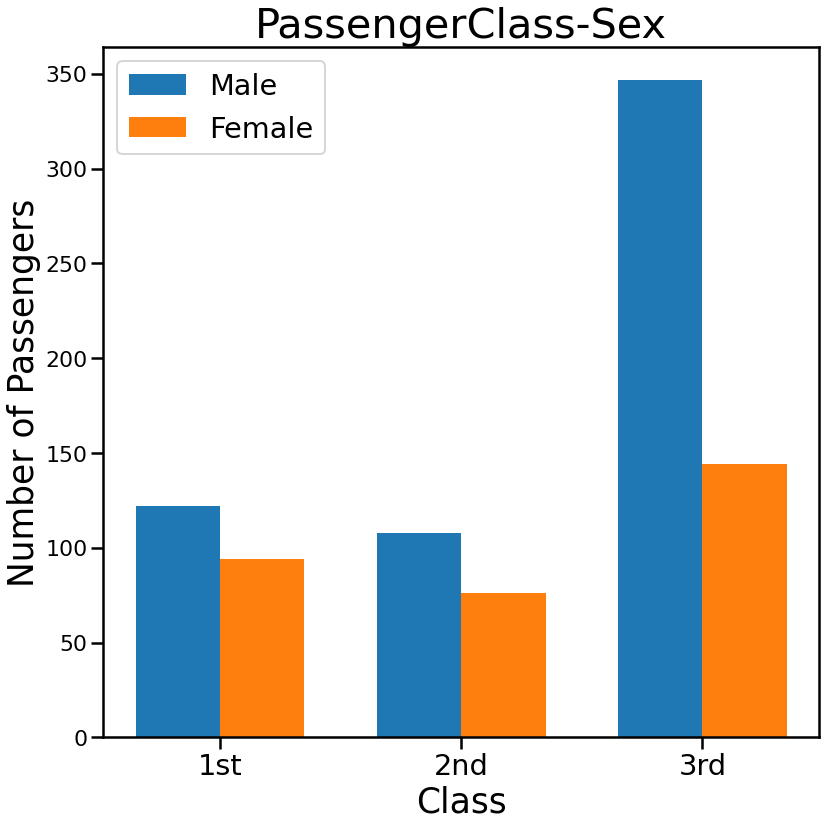

In [ ]:
labels = ["1st", "2nd", "3rd"]
male = [count_1m, count_2m, count_3m]
female = [count_1f, count_2f, count_3f]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = [12, 12])
plot1 = ax.bar(x - width/2,
               male,
               width,
               label = "Male")
plot2 = ax.bar(x + width/2,
               female,
               width,
               label = "Female")

ax.set_title("PassengerClass-Sex", 
             size = "xx-large")

ax.set_ylabel("Number of Passengers", 
              size = "x-large")

ax.set_xlabel("Class", 
              size = "x-large")

ax.set_xticks(x)
ax.set_xticklabels(labels, 
                   size = "large")

ax.legend(fontsize = "large")
fig.tight_layout()
plt.show()

Clearly, **3rd Clss has the maximum Sex Ratio**. So it can be said that, maximum of the male passengers travelling in 3rd class, were alone.

Now, the percentages of each Passenger Class in each of the Male ppopulation and Female population, are shown in the following output.

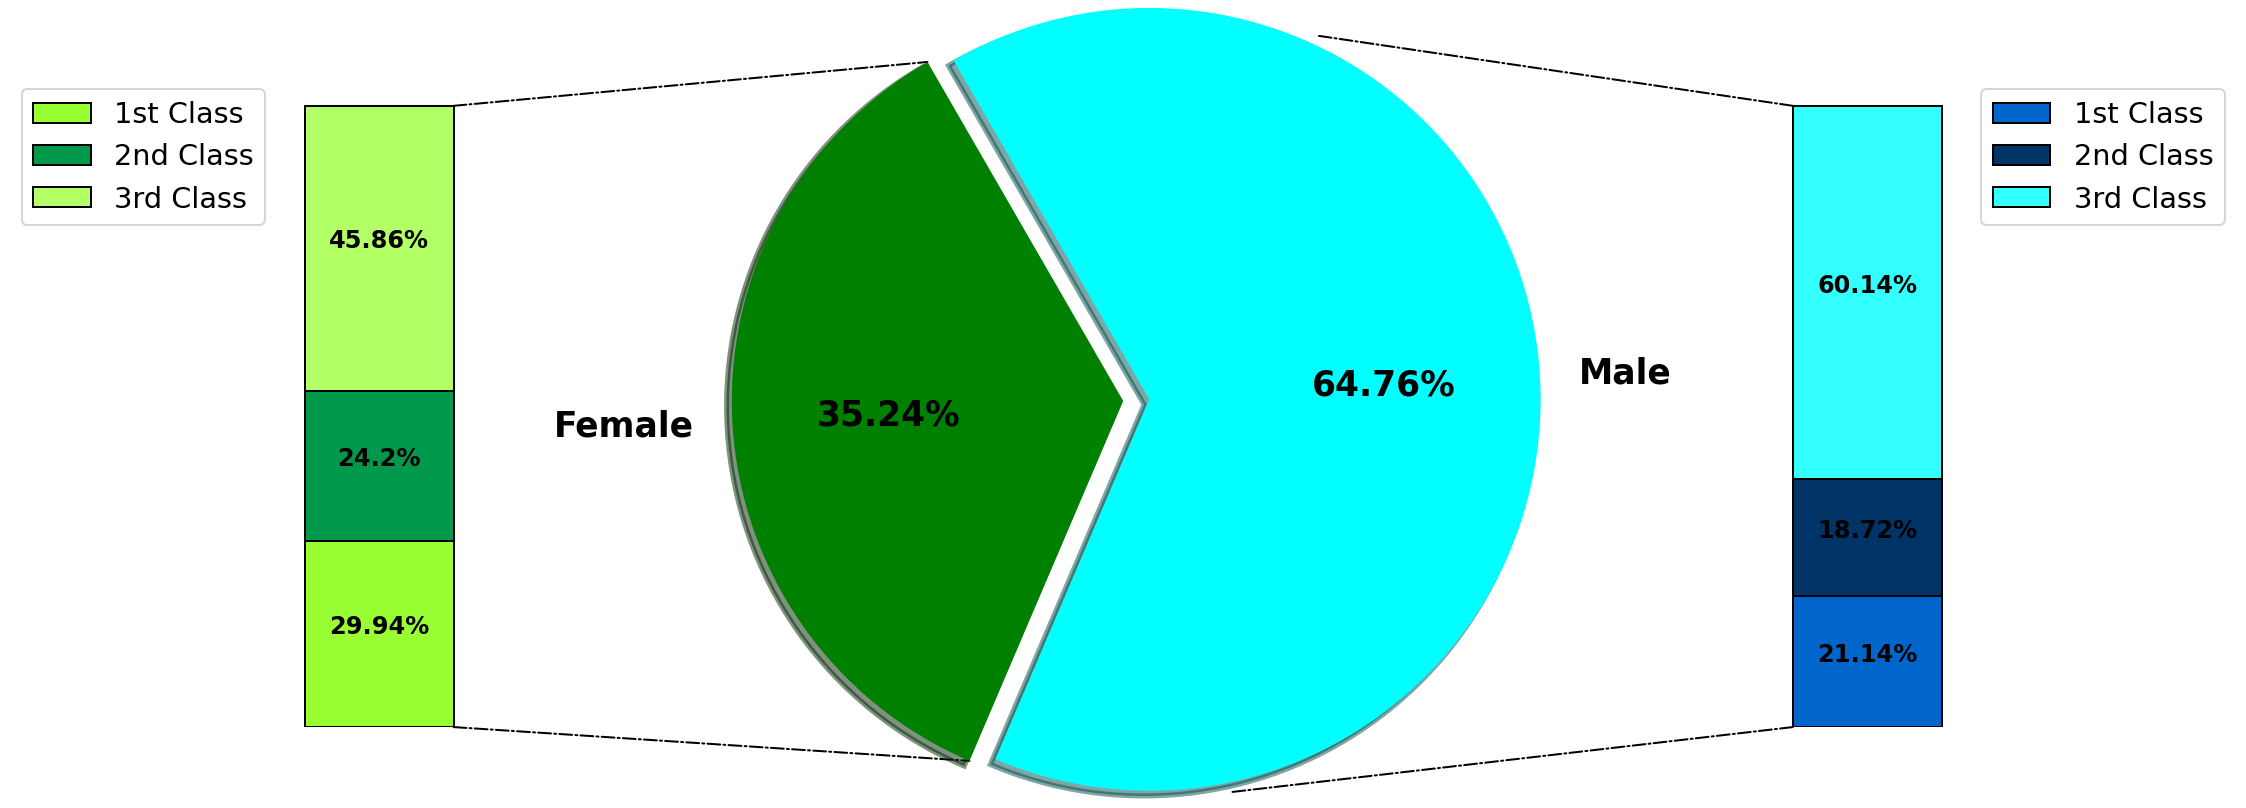

In [ ]:
fig, (femaleBar, totalPie, maleBar) = plt.subplots(1, 3, figsize = (40,12))
fig.subplots_adjust(wspace = 0)


# 1. Creating Pie chart with total Female and total Male
totalPie.pie( 
    [sum(female), sum(male)],
    explode = [0, 0.1],
    labels = ["Female", "Male"],
    colors = ["green", "cyan"],
    autopct = "%2.2f%%",
    shadow = True,
    startangle = 120,
    radius = 1.5,
    wedgeprops = {"linewidth" : 5},
    textprops = {"fontsize" : "x-large",
                 "weight" : "bold"}
)
# 2. Creating Bar chart based on the Female Data

# 2.1. Creating Bar chart on Female - 1st Class
femaleBar.bar(
    x = "Female",
    height = female[0],
    width = 0.1,
    bottom = 0,
    label = "1st Class",
    align = "center",
    edgecolor  ="black",
    color = "#99FF33"
)
femaleBar.text(x = 0,
               y = female[0]/2,
               s = str(np.round(female[0] * 100/sum(female), 2))+"%",
               ha = "center",
               weight = "bold")
# 2.2. Creating Bar chart on Female - 2nd Class
femaleBar.bar(
    x = "Female",
    height = female[1],
    width = 0.1,
    bottom = female[0],
    label = "2nd Class",
    align = "center",
    edgecolor = "black",
    color = "#00994C"
)
femaleBar.text(x = 0,
                 y = female[0] + female[1]/2,
                 s = str(np.round(female[1] * 100/sum(female), 2))+"%",
                 ha = "center",
                 weight = "bold")

# 2.3. Creating Bar chart on female - 3rd Class
femaleBar.bar(
    x = "Female",
    height = female[2],
    width = 0.1,
    bottom = female[0] + female[1],
    label = "3nd Class",
    align = "center",
    edgecolor = "black",
    color = "#B2FF66"
)
femaleBar.text(x = 0,
               y = female[0] + female[1] + female[2]/2,
               s = str(np.round(female[2] * 100/sum(female), 2))+"%",
               ha = "center",
               weight = "bold")

# 2.4. Fix the axis of the bars
femaleBar.axis(xmin = -2.5 * 0.1,
                 xmax = 2.5 * 0.1)
femaleBar.axis("off")

# 2.5. Customise the legend
femaleBar.legend(labels = ("1st Class", "2nd Class", "3rd Class"),
                 loc = "upper left",
                 fontsize = "large")

# 3. Line from Pie to female Bar
# Here, ConnectionPatch is used to draw lines between two plots

# 3.1. Get the wedge data
theta1 = totalPie.patches[0].theta1
theta2 = totalPie.patches[0].theta2
center = totalPie.patches[0].center
radius = totalPie.patches[0].r
bar_height = sum(item.get_height() for item in femaleBar.patches)

# 3.2. Top Connecting Line
x = radius * np.cos(np.pi / 180 * theta1) + center[0]
y = radius * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA = (0.1/2, bar_height),
                      coordsA = femaleBar.transData,
                      xyB = (x , y),
                      coordsB = totalPie.transData)
con.set_color([0, 0, 0])
femaleBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")

# 3.3. Bottom Connecting Line
x = radius * np.cos(np.pi / 180 * theta2) - center[0]
y = radius * np.sin(np.pi / 180 * theta2) - center[1]
con = ConnectionPatch(xyA = (0.1/2, 0),
                      coordsA = femaleBar.transData,
                      xyB = (x, y),
                      coordsB = totalPie.transData)
con.set_color([0, 0, 0])
femaleBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")


# 4. Creating Bar chart based on the Male Data

# 4.1. Creating Bar chart on Male - 1st Class
maleBar.bar(
    x = "male",
    height = male[0],
    width = 0.1,
    bottom = 0,
    label = "1st Class",
    align = "center",
    edgecolor = "black",
    color = "#0066CC"
)
maleBar.text(x = 0,
             y = male[0]/2,
             s = str(np.round(male[0] * 100/sum(male), 2))+"%",
             ha = "center",
             weight = "bold")
# 4.2. Creating Bar chart on Male - 2nd Class
maleBar.bar(
    x = "male",
    height = male[1],
    width = 0.1,
    bottom = male[0],
    label = "Female",
    align = "center",
    edgecolor = "black",
    color = "#003366"
)
maleBar.text(x = 0,
             y = male[0] + male[1]/2,
             s = str(np.round(male[1] * 100/sum(male), 2))+"%",
             ha = "center",
             weight = "bold")

# 4.3. Creating Bar chart on Male - 3rd Class
maleBar.bar(
    x = "male",
    height = male[2],
    width = 0.1,
    bottom = male[0] + male[1],
    label = "3rd Class",
    align = "center",
    edgecolor = "black",
    color = "#33FFFF"
)
maleBar.text(x = 0,
             y = male[0] + male[1] + male[2]/2,
             s = str(np.round(male[2] * 100/sum(male), 2))+"%",
             ha = "center",
             weight = "bold")

# 4.4. Fix the axis of the bars
maleBar.axis(xmin = -2.5 * 0.1,
             xmax = 2.5 * 0.1)
maleBar.axis("off")

# 4.5. Customise the legend
maleBar.legend(labels = ("1st Class", "2nd Class", "3rd Class"),
               loc = "upper right",
               fontsize = "large")

# 5. Line from Pie to male Bar
# ConnectionPatch is used to draw lines between two plots

# 5.1. Get the wedge data
theta1 = totalPie.patches[0].theta1
theta2 = totalPie.patches[0].theta2
center = totalPie.patches[0].center
radius = totalPie.patches[0].r
bar_height = sum(item.get_height() for item in maleBar.patches)
# 5.2. Top Connecting Line
x = radius * np.cos(np.pi / 180 * theta1) + center[0]
y = radius * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA = (-0.1/2, bar_height),
                      coordsA = maleBar.transData,
                      xyB = (x + 1.5, y + 0.1),
                      coordsB = totalPie.transData)
con.set_color([0, 0, 0])
maleBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")

# 5.3. Bottom Connecting Line
x = radius * np.cos(np.pi / 180 * theta2) + center[0]
y = radius * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA = (-0.1/2, 0),
                      coordsA = maleBar.transData,
                      xyB = (x + 1, y - 0.12),
                      coordsB = totalPie.transData)
con.set_color([0, 0, 0])
maleBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")

# 6. Final Output
plt.show()


**Passenger Class - Survived**

The Class in which a passenger was travelling can also be viwed as the Social Status of that passenger.

Questions :

1 Did Social Status played any role in survival of the passengers?

2 What is the percentage of combination of each Passenger Class in each of the Survived population and the Died population?

Here, the number of passengers who survived and died for each of the three Passenger classes will be calculated. Clearly, we will have to calculate the number of Passesngers for the following six cases :

Case	Survival Status	Class

1	Survived	1st Class

2	Died	1st Class

3	Survived	2nd Class

4	Died	2nd Class

5	Survived	3rd Class

6	Died	3rd Class

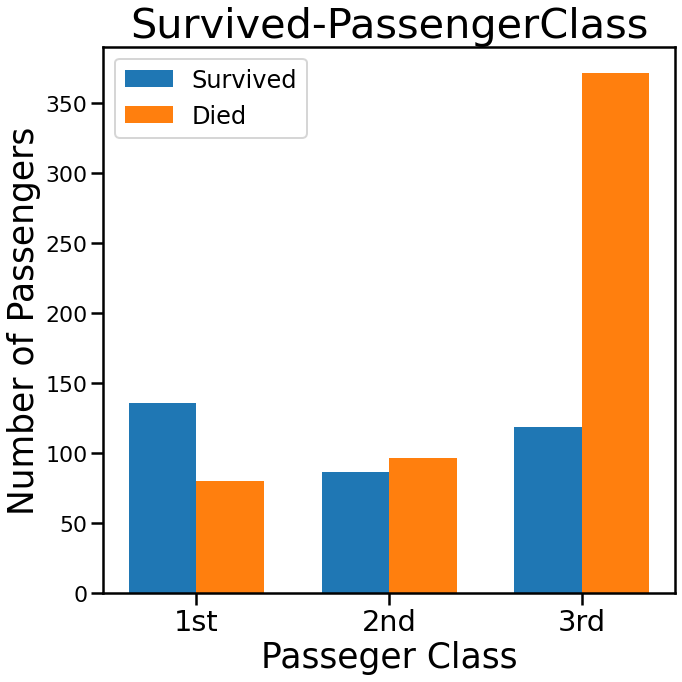

In [ ]:
# Count number of Passengers
count_1s = df["Survived"][df["Survived"] == "Yes"][df["PassengerClass"] == "1st"].count()
count_2s = df["Survived"][df["Survived"] == "Yes"][df["PassengerClass"] == "2nd"].count()
count_3s = df["Survived"][df["Survived"] == "Yes"][df["PassengerClass"] == "3rd"].count()

count_1d = df["Survived"][df["Survived"] == "No"][df["PassengerClass"] == "1st"].count()
count_2d = df["Survived"][df["Survived"] == "No"][df["PassengerClass"] == "2nd"].count()
count_3d = df["Survived"][df["Survived"] == "No"][df["PassengerClass"] == "3rd"].count()

# Plot the result of the six cases
labels = ["1st", "2nd", "3rd"]
survived = [count_1s, count_2s, count_3s]
died = [count_1d, count_2d, count_3d]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = [10, 10])
plot1 = ax.bar(
    x - width/2,
    survived,
    width,
    label = "Survived"
)
plot2 = ax.bar(x + width/2,
    died,
    width,
    label = "Died"
)

ax.set_title(
    "Survived-PassengerClass", 
    size = "xx-large"
)

ax.set_ylabel(
    "Number of Passengers", 
    size = "x-large"
)

ax.set_xlabel(
    "Passeger Class", 
    size = "x-large"
)

ax.set_xticks(x)

ax.set_xticklabels(
    labels, 
    size = "large"
)

ax.legend(fontsize = "medium")
fig.tight_layout()
plt.show()

So, most of the passengers who died were from 3rd Class.

To be more confident on the our inference, Chi-Square Test will be used on the following hypothese.

$H_0$ : Social Status had no role in Survival of a passenger. against $H_1$ : Social Status had a significant role in Survival of a passenger.

In [ ]:
pc_surv = pd.crosstab(
                [df["Survived"]],
                [df["PassengerClass"]]
            )
chi2, p, dof, ex = stats.chi2_contingency(pc_surv)
pd.DataFrame(
    data = [round(chi2, 3), round(p, 3)],
    columns = ["Value"],
    index = ["Chi Sq", "p"]
)

,Value
Chi Sq,102.889
p,0.000


As the p-value is less than 0.05, the probability of Social Status having a role in Survival of a passenger will be high. Hence, we can reject the null hypothesis.

The actual numbers in the considered 6 cases are shown in the following table.

In [ ]:
pc_surv.style.background_gradient(cmap = "tab20c_r" )

PassengerClass,1st,2nd,3rd
Survived,,,
No,80,97,372
Yes,136,87,119


So, **Money and Social Status** saved many lives that day.

The combination of percentage of population of each Passenger Class in each of the Survived population and the Died population is shown in the following output.

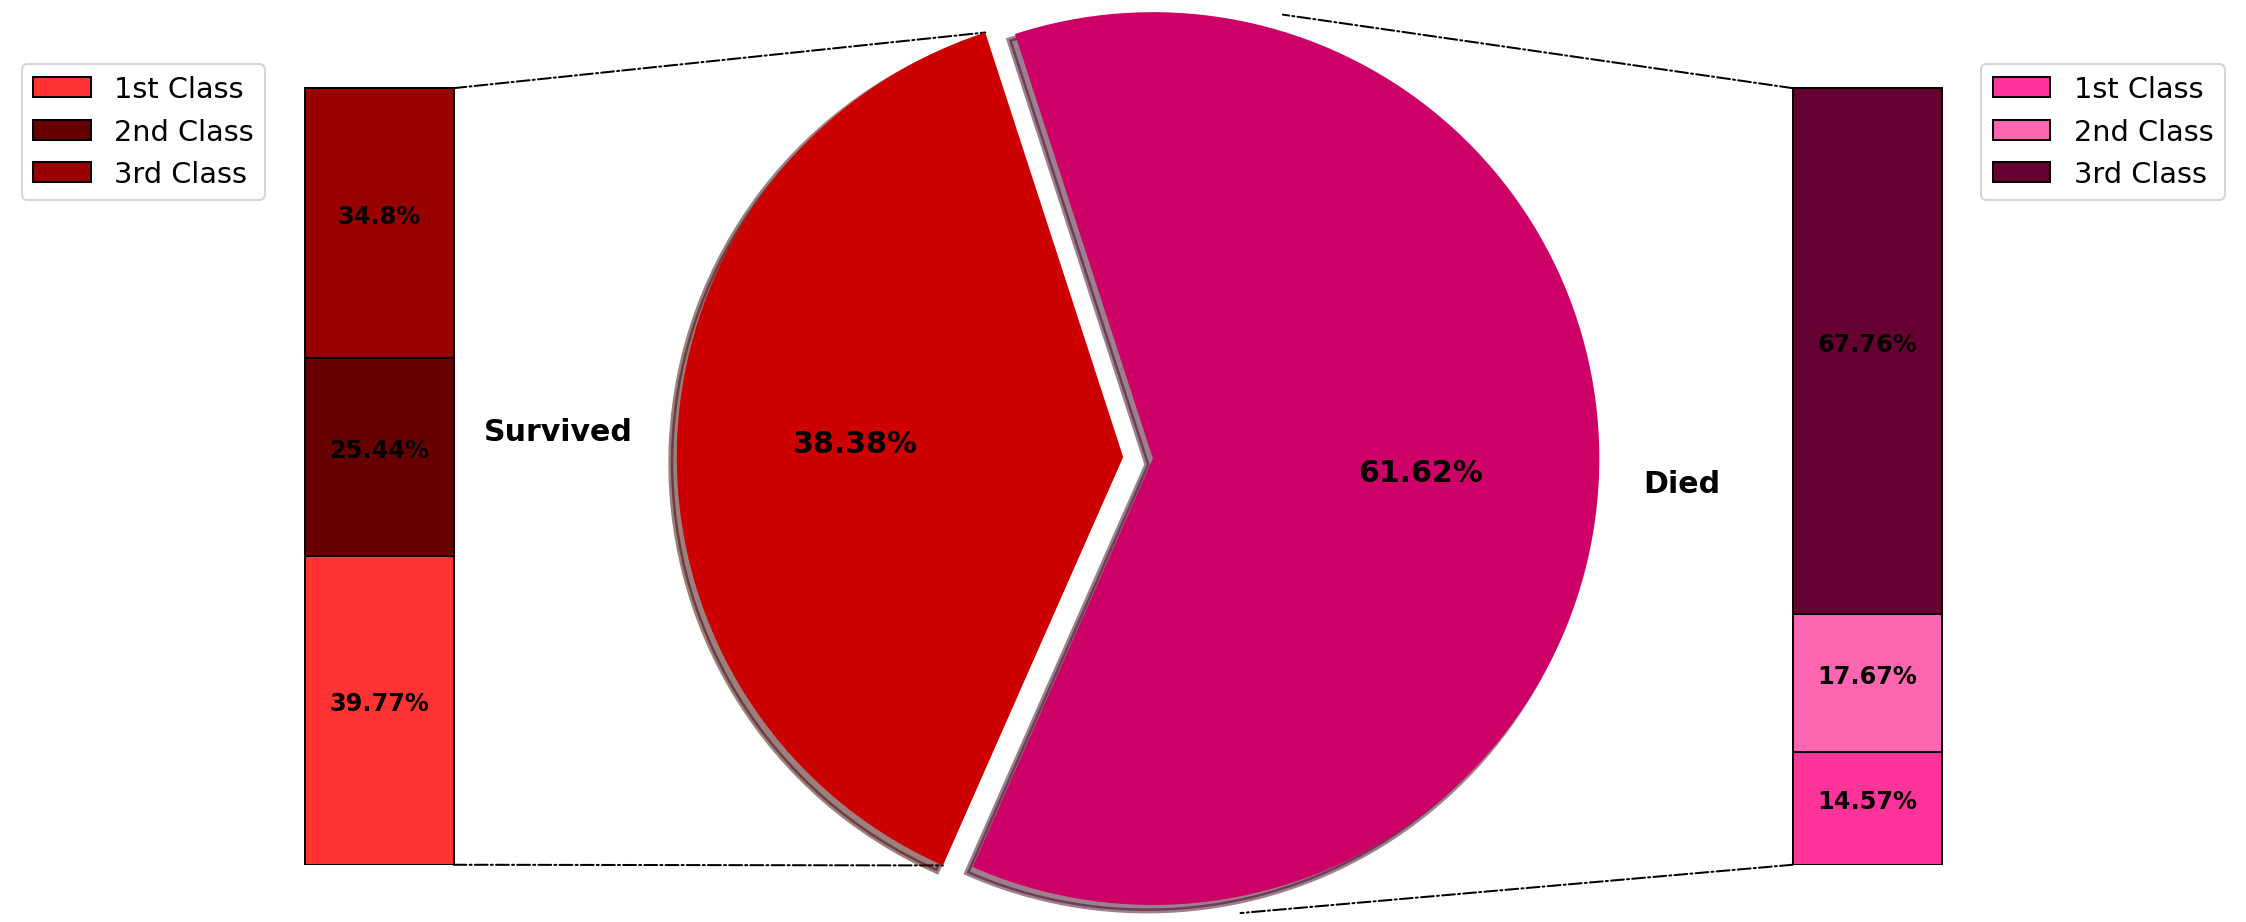

In [ ]:
fig, (survivedBar, totalPie, diedBar) = plt.subplots(1, 3, figsize = (40,15))
fig.subplots_adjust(wspace = 0)


# 1. Creating Pie chart with total Survived and total Died
totalPie.pie( 
    [sum(survived), sum(died)],
    explode = [0, 0.1],
    labels = ["Survived", "Died"],
    colors = ["#CC0000", "#CC0066"],
    autopct = '%2.2f%%',
    shadow = True,
    startangle = 108,
    radius = 1.5,
    wedgeprops = {"linewidth" : 5},
    textprops = {"fontsize" : 30,
                 "weight" : "bold"}
)


# 2. Creating Bar chart based on the Survived Data

# 2.1. Creating Bar chart on Survived - 1st Class
survivedBar.bar(
    x = "Survived",
    height = survived[0],
    width = 0.1,
    bottom = 0,
    label = "1st Class",
    align = "center",
    edgecolor  ="black",
    color = "#FF3333"
)
survivedBar.text(
    x = 0,
    y = survived[0]/2,
    s = str(np.round(survived[0] * 100/sum(survived), 2))+"%",
    ha = "center",
    weight = "bold"
)

# 2.2. Creating Bar chart on Survived - 2nd Class
survivedBar.bar(
    x = "Survived",
    height = survived[1],
    width = 0.1,
    bottom = survived[0],
    label = "2nd Class",
    align = "center",
    edgecolor = "black",
    color = "#660000"
)
survivedBar.text(
    x = 0,
    y = survived[0] + survived[1]/2,
    s = str(np.round(survived[1] * 100/sum(survived), 2))+"%",
    ha = "center",
    weight = "bold"
)
# 2.3. Creating Bar chart on Survived - 3rd Class
survivedBar.bar(
    x = "Survived",
    height = survived[2],
    width = 0.1,
    bottom = survived[0] + survived[1],
    label = "3nd Class",
    align = "center",
    edgecolor = "black",
    color = "#990000"
)
survivedBar.text(
    x = 0,
    y = survived[0] + survived[1] + survived[2]/2,
    s = str(np.round(survived[2] * 100/sum(survived), 2))+"%",
    ha = "center",
    weight = "bold"
)

# 2.4. Fix the axis of the bars
survivedBar.axis(
    xmin = -2.5 * 0.1,
    xmax = 2.5 * 0.1
)
survivedBar.axis("off")

# 2.5. Customise the legend
survivedBar.legend(
    labels = ("1st Class", "2nd Class", "3rd Class"),
    loc = "upper left",
    fontsize = "large"
)
# 3. Line from Pie to Survived Bar
# Here, ConnectionPatch is used to draw lines between two plots

# 3.1. Get the wedge data
theta1 = totalPie.patches[0].theta1
theta2 = totalPie.patches[0].theta2
center = totalPie.patches[0].center
radius = totalPie.patches[0].r
bar_height = sum(item.get_height() for item in survivedBar.patches)

# 3.2. Top Connecting Line
x = radius * np.cos(np.pi / 180 * theta1) + center[0]
y = radius * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(
            xyA = (0.1/2, bar_height),
            coordsA = survivedBar.transData,
            xyB = (x , y),
            coordsB = totalPie.transData
        )
con.set_color([0, 0, 0])
survivedBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")

# 3.3. Bottom Connecting Line
x = radius * np.cos(np.pi / 180 * theta2) - center[0]
y = radius * np.sin(np.pi / 180 * theta2) - center[1]
con = ConnectionPatch(
            xyA = (0.1/2, 0),
            coordsA = survivedBar.transData,
            xyB = (x, y),
            coordsB = totalPie.transData
        )
con.set_color([0, 0, 0])
survivedBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")


# 4. Creating Bar chart based on the Died Data

# 4.1. Creating Bar chart on Died - 1st Class
diedBar.bar(
    x = "Died",
    height = died[0],
    width = 0.1,
    bottom = 0,
    label = "1st Class",
    align = "center",
    edgecolor = "black",
    color = "#FF3399"
)
diedBar.text(
    x = 0,
    y = died[0]/2,
    s = str(np.round(died[0] * 100/sum(died), 2))+"%",
    ha = "center",
    weight = "bold"
)
# 4.2. Creating Bar chart on Died - 2nd Class
diedBar.bar(
    x = "Died",
    height = died[1],
    width = 0.1,
    bottom = died[0],
    label = "Female",
    align = "center",
    edgecolor = "black",
    color = "#FF66B2"
)
diedBar.text(
    x = 0,
    y = died[0] + died[1]/2,
    s = str(np.round(died[1] * 100/sum(died), 2))+"%",
    ha = "center",
    weight = "bold"
)

# 4.3. Creating Bar chart on Died - 3rd Class
diedBar.bar(
    x = "Died",
    height = died[2],
    width = 0.1,
    bottom = died[0] + died[1],
    label = "3rd Class",
    align = "center",
    edgecolor = "black",
    color = "#660033"
)
diedBar.text(
    x = 0,
    y = died[0] + died[1] + died[2]/2,
    s = str(np.round(died[2] * 100/sum(died), 2))+"%",
    ha = "center",
    weight = "bold"
)

# 4.4. Fix the axis of the bars
diedBar.axis(
    xmin = -2.5 * 0.1,
    xmax = 2.5 * 0.1
)
diedBar.axis("off")

# 4.5. Customise the legend
diedBar.legend(
    labels = ("1st Class", "2nd Class", "3rd Class"),
    loc = "upper right",
    fontsize = "large"
)
# 5. Line from Pie to Died Bar
# ConnectionPatch is used to draw lines between two plots

# 5.1. Get the wedge data
theta1 = totalPie.patches[0].theta1
theta2 = totalPie.patches[0].theta2
center = totalPie.patches[0].center
radius = totalPie.patches[0].r
bar_height = sum(item.get_height() for item in diedBar.patches)

# 5.2. Top Connecting Line
x = radius * np.cos(np.pi / 180 * theta1) + center[0]
y = radius * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(
            xyA = (-0.1/2, bar_height),
            coordsA = diedBar.transData,
            xyB = (x + 1, y + 0.06),
            coordsB = totalPie.transData
        )
con.set_color([0, 0, 0])
diedBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")
# 5.3. Bottom Connecting Line
x = radius * np.cos(np.pi / 180 * theta2) + center[0]
y = radius * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(
            xyA = (-0.1/2, 0),
            coordsA = diedBar.transData,
            xyB = (x + 1, y - 0.16),
            coordsB = totalPie.transData
        )
con.set_color([0, 0, 0])
diedBar.add_artist(con)
con.set_linewidth(2)
con.set_linestyle("-.")

# 6. Final Output
plt.show()

**Survived - Sex - Passenger Class**

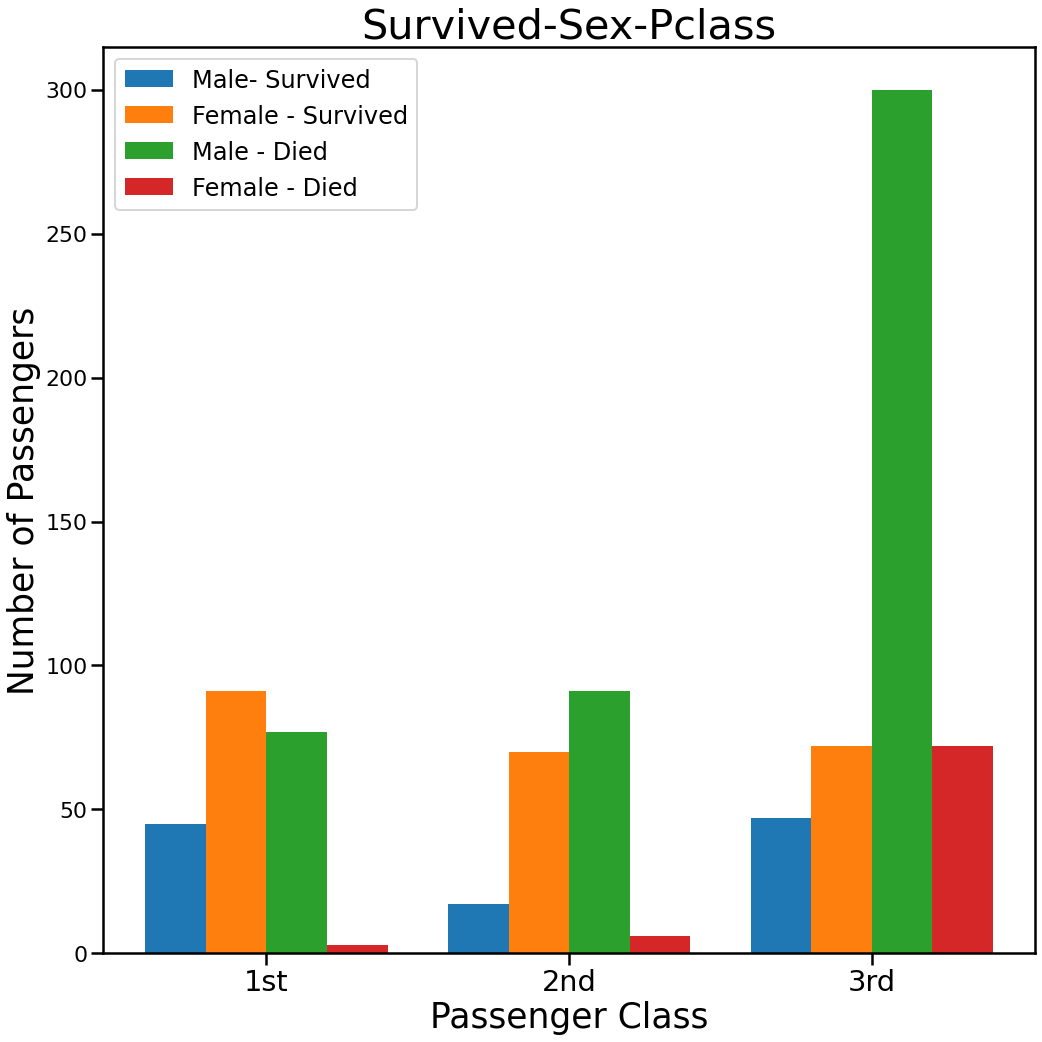

In [ ]:
# Calculate the number of passengers
count_dm1 = df["Survived"][df["Survived"] == "No"][df["Sex"] == "Male"][df["PassengerClass"] == "1st"].count()
count_dm2 = df["Survived"][df["Survived"] == "No"][df["Sex"] == "Male"][df["PassengerClass"] == "2nd"].count()
count_dm3 = df["Survived"][df["Survived"] == "No"][df["Sex"] == "Male"][df["PassengerClass"] == "3rd"].count()

count_df1 = df["Survived"][df["Survived"] == "No"][df["Sex"] == "Female"][df["PassengerClass"] == "1st"].count()
count_df2 = df["Survived"][df["Survived"] == "No"][df["Sex"] == "Female"][df["PassengerClass"] == "2nd"].count()
count_df3 = df["Survived"][df["Survived"] == "No"][df["Sex"] == "Female"][df["PassengerClass"] == "3rd"].count()

count_sm1 = df["Survived"][df["Survived"] == "Yes"][df["Sex"] == "Male"][df["PassengerClass"] == "1st"].count()
count_sm2 = df["Survived"][df["Survived"] == "Yes"][df["Sex"] == "Male"][df["PassengerClass"] == "2nd"].count()
count_sm3 = df["Survived"][df["Survived"] == "Yes"][df["Sex"] == "Male"][df["PassengerClass"] == "3rd"].count()

count_sf1 = df["Survived"][df["Survived"] == "Yes"][df["Sex"] == "Female"][df["PassengerClass"] == "1st"].count()
count_sf2 = df["Survived"][df["Survived"] == "Yes"][df["Sex"] == "Female"][df["PassengerClass"] == "2nd"].count()
count_sf3 = df["Survived"][df["Survived"] == "Yes"][df["Sex"] == "Female"][df["PassengerClass"] == "3rd"].count()

# Plot the result of the six cases
labels = ["1st", "2nd", "3rd"]
survivedMale = [count_sm1, count_sm2, count_sm3]
survivedFemale = [count_sf1, count_sf2, count_sf3]
diedMale = [count_dm1, count_dm2, count_dm3]
diedFemale = [count_df1, count_df2, count_df3]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize = [15, 15])
plotSurvivedMale = ax.bar(
                        x - 3*width/4,
                        survivedMale,
                        width/2,
                        label = "Male- Survived"
                    )
plotSurvivedFemale = ax.bar(
                        x - width/4,
                        survivedFemale,
                        width/2,
                        label = "Female - Survived"
                    )
plotDiedMale = ax.bar(
                    x + width/4,
                    diedMale,
                    width/2,
                    label = "Male - Died"
                )
plotDiedFemale = ax.bar(
                    x + 3*width/4,
                    diedFemale,
                    width/2,
                    label = "Female - Died"
                )
ax.set_title(
    "Survived-Sex-Pclass", 
    size = "xx-large")

ax.set_ylabel(
    "Number of Passengers", 
    size = "x-large"
)

ax.set_xlabel(
    "Passenger Class", 
    size = "x-large"
)

ax.set_xticks(x)

ax.set_xticklabels(
    labels, 
    size = "large"
)

ax.legend(fontsize = "medium")
fig.tight_layout()
plt.show()

In [ ]:
survivedMale.append(sum(survivedMale))
survivedFemale.append(sum(survivedFemale))
survivedTotal = [sum(x) for x in zip(survivedMale, survivedFemale)]

diedMale.append(sum(diedMale))
diedFemale.append(sum(diedFemale))
diedTotal = [sum(x) for x in zip(diedMale, diedFemale)]

totalMale = [sum(x) for x in zip(survivedMale, diedMale)]
totalFemale = [sum(x) for x in zip(survivedFemale, diedFemale)]
totalGrand = [sum(x) for x in zip(totalMale, totalFemale)]

pd.DataFrame(
    index=[["Survived", "Survived", "Survived", 
            "Died", "Died", "Died",
            "Total", "Total", "Total"], 
            ["Male", "Female", "Total", 
             "Male", "Female", "Total",
             "Male", "Female", "Total",]],
    columns=["1st Class", "2nd Class", "3rd Class", "Total"],
    data = [survivedMale, survivedFemale, survivedTotal, 
            diedMale, diedFemale, diedTotal,
            totalMale, totalFemale, totalGrand]).style.background_gradient(cmap = "inferno")

From the above plot and table, we can say that :

* Number of female passengers of first class, who survived is equal to the number of male passengers travelling in the second class, who did not survive.

* The survival ratio is equal in case of the female passengers who travelled in third class.

* The number of male passengers from the third class, who did not survive, is maximum among the "Dead" cases.

* The number of female passengers from the first class, who survived, is maximum among the "Survived" cases.

* The number of female passengers of the first class, who did not survive, is minimum among the "Died" cases.

* The number of male passengers from the second class, who survived, is minimum among the "Survived" cases.

# Embarked

Questions :

1 From which port did maximum number of passengers boarded?

2 What are the percentages of populations that boarded from various ports?
Here, the number of Passengers who boarded from each port, wll be calculated.

Suppose,

* $p_c$ denotes the number of passengers from Cherbourg
* $p_q$ denotes the number of passengers from Queenstown
* $p_s$ denotes the number of passengers from Southampton

The values will then be shown in a plot.

Text(0, 0.5, 'Number of Passengers')

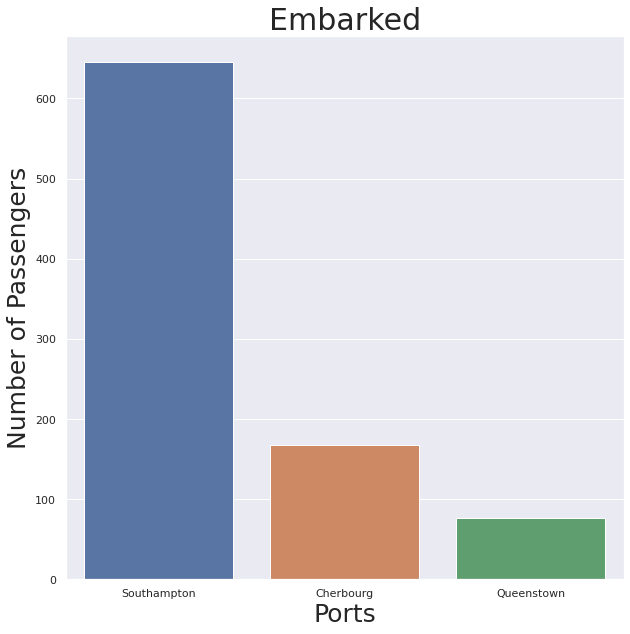

In [ ]:
plt.figure( figsize = [10, 10] )
sns.set_theme(style = "darkgrid")
plt.title(
    "Embarked",
    fontsize = 30
)
sns.countplot(
    "Embarked",
    data = df
)
plt.xlabel(
    "Ports",
    fontsize = 25
)
plt.ylabel(
    "Number of Passengers",
    fontsize = 25
)


Based on the above plot, it can be said that :

$p_s$ $\approx$ 640 $p_c$ $\approx$ 170 $p_q$ $\approx$ 80

Now we will obtain the exact values of $p_c$, $p_q$ and $p_s$.

In [ ]:
count_s = 0
count_c = 0
count_q = 0

for i in df["Embarked"] :
    if i == "Southampton" :
        count_s += 1
    elif i == "Cherbourg" :
        count_c += 1
    else :
        count_q += 1

print("Number of passengers from Cherbourg : ", count_c)
print("Number of passengers from Queenstown : ", count_q)
print("Number of passengers from Southampton : ", count_s)

Number of passengers from Cherbourg :  168
Number of passengers from Queenstown :  77
Number of passengers from Southampton :  646


So, the actual values obtained are :

$p_s$ = 646 $p_c$ = 168 $p_q$ = 77

The percentages of passenger populations that boarded from various ports are shown in the following plot.

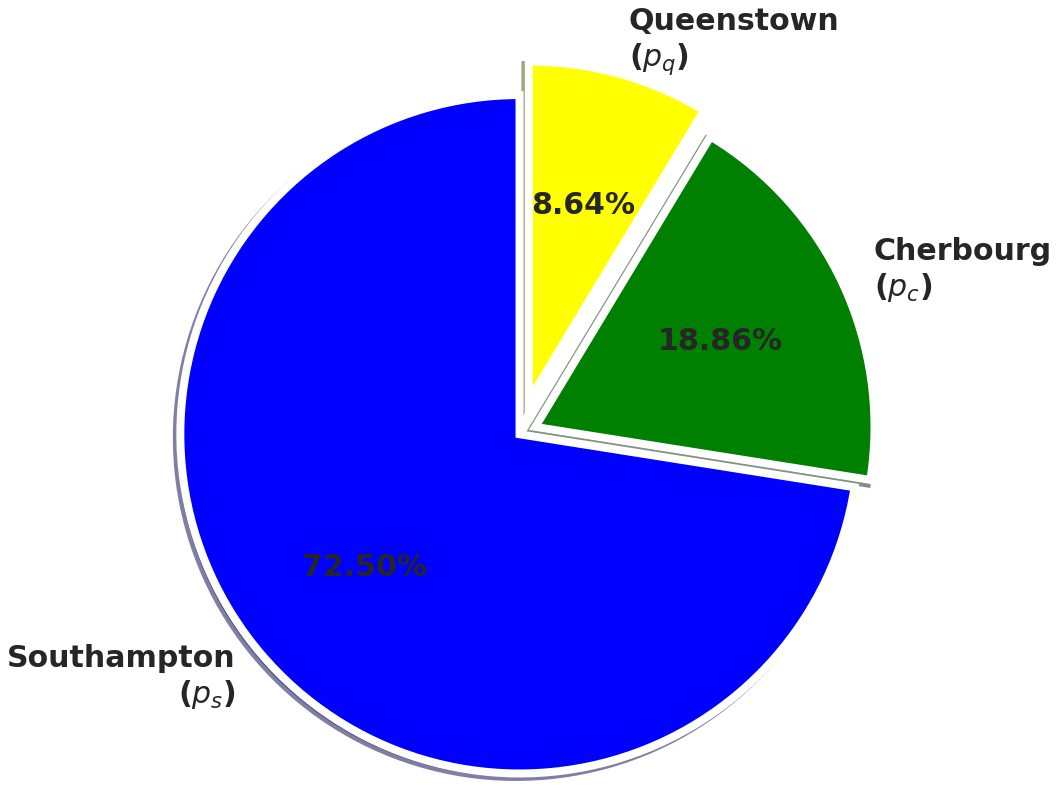

In [ ]:
plt.figure( figsize = [8, 8] )
plt.pie( 
    [count_s, count_c, count_q],
    explode = [0, 0.1, 0.2],
    labels = ["Southampton\n($p_s$)", "Cherbourg\n($p_c$)", "Queenstown\n($p_q$)"],
    colors = ["blue", "green", "yellow"],
    autopct = '%2.2f%%',
    shadow = True,
    startangle = 90,
    radius = 1.95,
    wedgeprops = {"linewidth" : 8},
    textprops = {"fontsize" : 30,
                 "weight" : "bold"}
)
plt.show()

So, it can be said that :

* Maximum number of passengers were from Southampton Port.
* Minimum Number of Passengers were from Queenstown Port.
# Survived - Embarked
Question : What are the survival ratio of each port?

Survival Ratio can be defined as the ratio of the size of the survived population to the died population.

Here, the number of passengers, who survived or died, boarding from each of the three Embarked ports, will be calculated.

So here, we will have to consider six cases.

Case	Survival Status	Embarked

1	Survived	Cherbourg

2	Died	Cherbourg

3	Survived	Southampton

4	Died	Southampton

5	Survived	Queenstown

6	Died	Queenstown

The Survival Ratio of each port is shown in the following table

In [ ]:
count_sc = (df["Survived"][df["Survived"] == "Yes"][df["Embarked"] == "Cherbourg"].count())
count_ss = (df["Survived"][df["Survived"] == "Yes"][df["Embarked"] == "Southampton"].count())
count_sq = (df["Survived"][df["Survived"] == "Yes"][df["Embarked"] == "Queenstown"].count())

count_dc = (df["Survived"][df["Survived"] == "No"][df["Embarked"] == "Cherbourg"].count())
count_ds = (df["Survived"][df["Survived"] == "No"][df["Embarked"] == "Southampton"].count())
count_dq = (df["Survived"][df["Survived"] == "No"][df["Embarked"] == "Queenstown"].count())

survived = [count_sc, count_ss, count_sq]
died = [count_dc, count_ds, count_dq]

pd.DataFrame(
    index = ["Cherbourg", "Southampton", "Queenstown"],
    data = {"Survived" : survived, 
            "Died" : died,
            "Survival Ratio" : [(i/j) for (i,j) in zip(survived, died)] } 
).style.background_gradient(cmap = "inferno")

,Survived,Died,Survival Ratio
Cherbourg,93,75,1.240000
Southampton,219,427,0.512881
Queenstown,30,47,0.638298


We can also visualize the survival ratio of each port with the following plot.

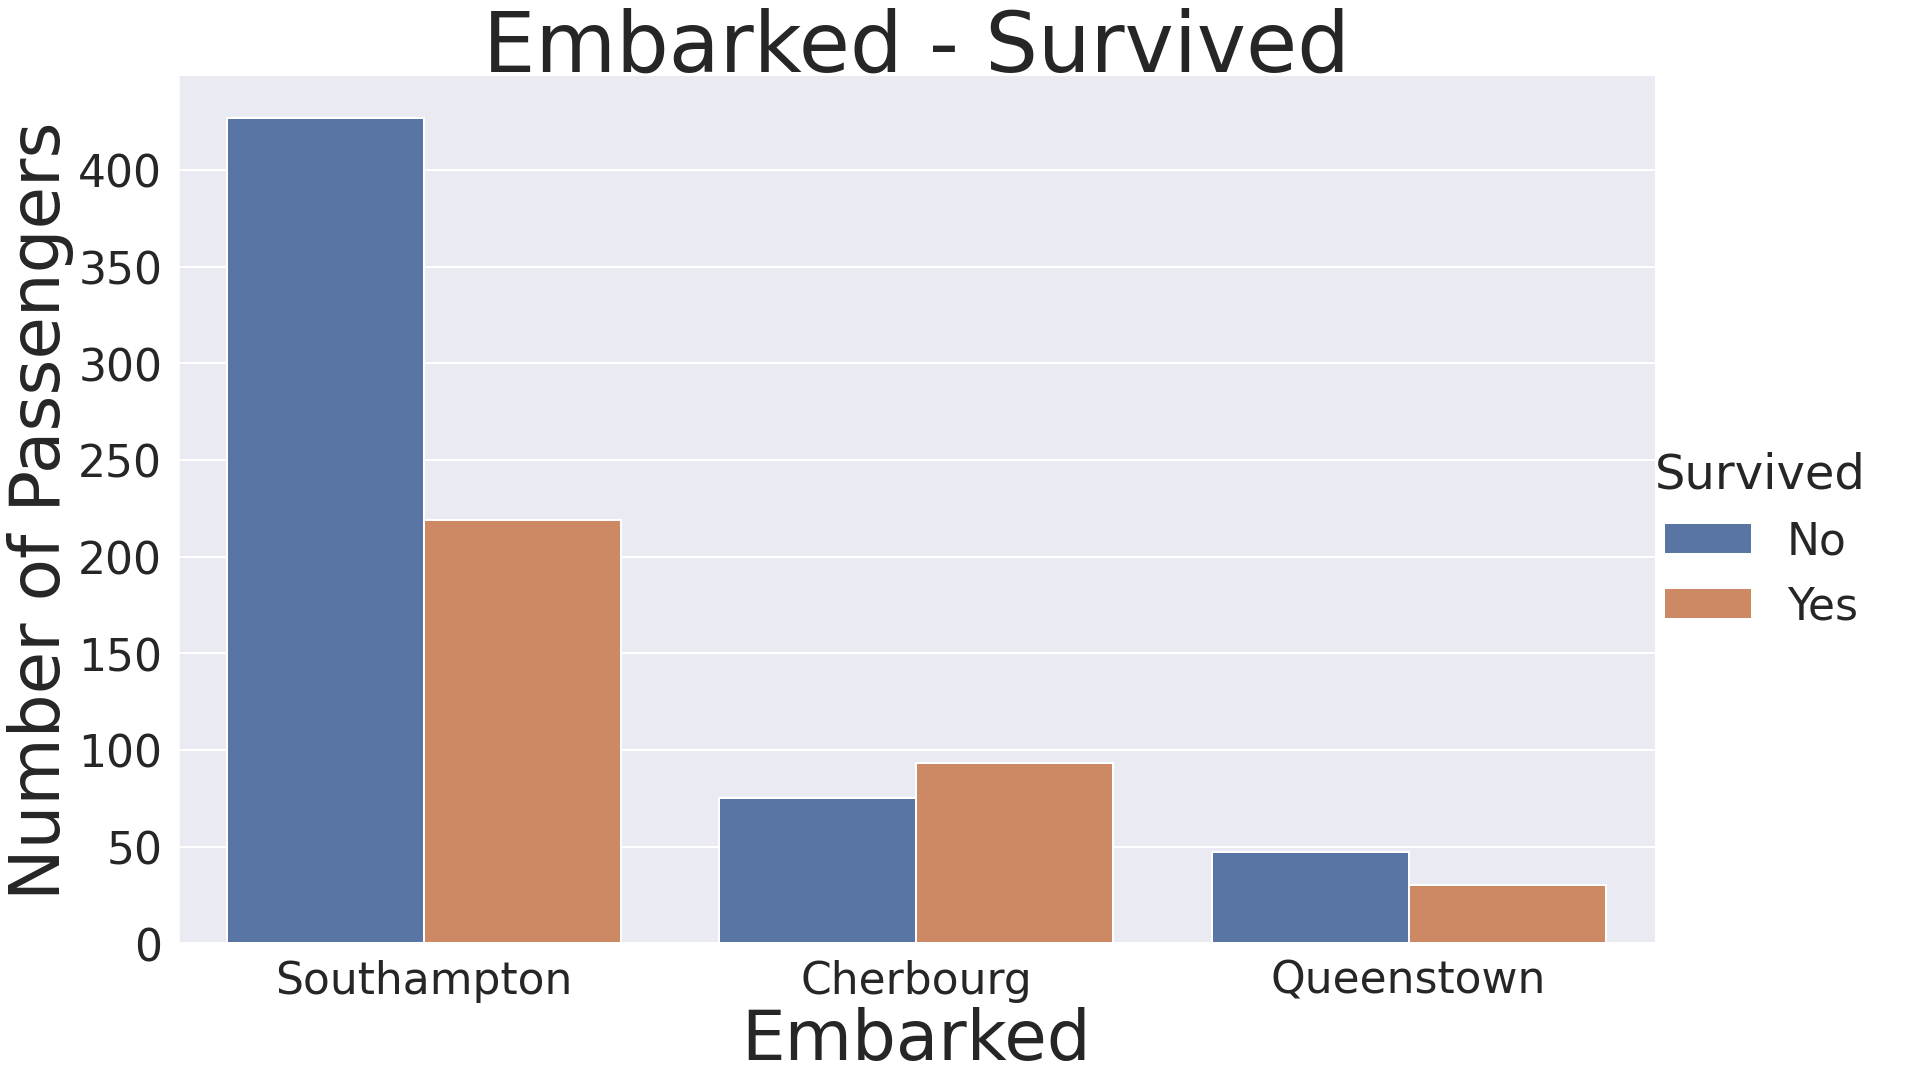

In [ ]:
sns.set_context("poster",
                font_scale = 2)
sns.catplot(
    x = "Embarked",
    hue = "Survived",
    data = df,
    kind = "count",
    height = 15,
    aspect = 8/5
)
plt.xlabel(
    "Embarked", 
    fontsize = "x-large"
)
plt.ylabel(
    "Number of Passengers", 
    fontsize = "x-large"
)
plt.title(
    "Embarked - Survived", 
    fontsize = "xx-large"
)
plt.show()

Most of the passengers, who died, boarded from Southampton.

**Embarked - Sex**

Question : What were the sex ratio of the passenger population of each port?

Here, the number of male passengers and female passengers who boarded from each of the three ports, will be calculated.

So here, we will have to consider six cases.

Case	Sex	Embarked

1	Male	Cherbourg

2	Female	Cherbourg

3	Male	Southampton

4	Female	Southampton

5	Male	Queenstown

6	Female	Queenstown

The Sex Ratio of each port is shown in the following table



In [ ]:
count_mc = (df["Sex"][df["Sex"] == "Male"][df["Embarked"] == "Cherbourg"].count())
count_ms = (df["Sex"][df["Sex"] == "Male"][df["Embarked"] == "Southampton"].count())
count_mq = (df["Sex"][df["Sex"] == "Male"][df["Embarked"] == "Queenstown"].count())

count_fc = (df["Sex"][df["Sex"] == "Female"][df["Embarked"] == "Cherbourg"].count())
count_fs = (df["Sex"][df["Sex"] == "Female"][df["Embarked"] == "Southampton"].count())
count_fq = (df["Sex"][df["Sex"] == "Female"][df["Embarked"] == "Queenstown"].count())

male = [count_mc, count_ms, count_mq]
female = [count_fc, count_fs, count_fq]

pd.DataFrame(
    index = ["Cherbourg", "Southampton", "Queenstown"],
    data = {"Male" : male, 
            "Female" : female,
            "Sex Ratio" : [(i/j) for (i,j) in zip(male, female)] } 
).style.background_gradient(cmap = "viridis")

,Male,Female,Sex Ratio
Cherbourg,95,73,1.301370
Southampton,441,205,2.151220
Queenstown,41,36,1.138889


We can also visualize the same with the plot below.

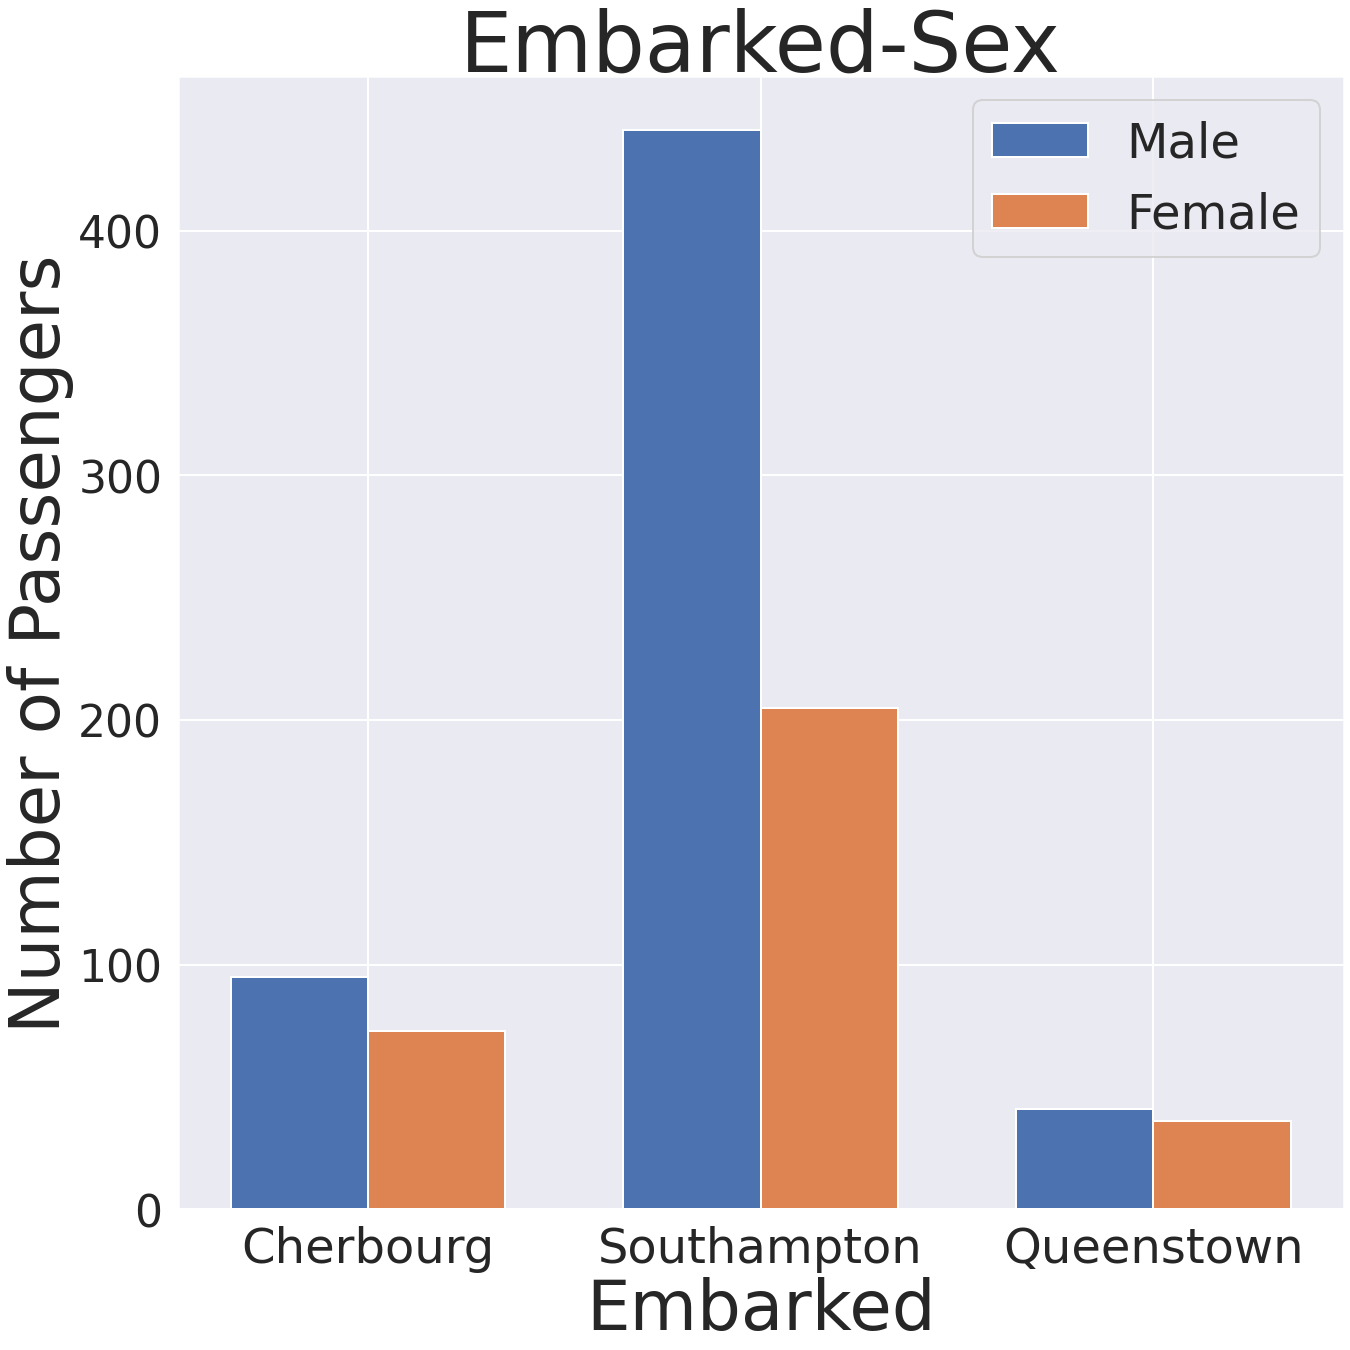

In [ ]:
labels = ["Cherbourg", "Southampton", "Queenstown"]
male = [count_mc, count_ms, count_mq]
female = [count_fc, count_fs, count_fq]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = [20, 20])
plot1 = ax.bar(x - width/2,
               male,
               width,
               label = "Male")
plot2 = ax.bar(x + width/2,
               female,
               width,
               label = "Female")

ax.set_title("Embarked-Sex", 
             size = "xx-large")

ax.set_ylabel("Number of Passengers", 
              size = "x-large")

ax.set_xlabel("Embarked", 
              size = "x-large")

ax.set_xticks(x)

ax.set_xticklabels(labels, 
                   size = "medium")

ax.legend(fontsize = "medium")
fig.tight_layout()
plt.show()

# Sex Ratio is maximum in case of the Southampton port.

# Survived - Sex - Embarked

In [ ]:
pd.crosstab(
    [df["Survived"]],
    [df["Embarked"], df["Sex"]]
).style.background_gradient(cmap = "brg")

# Survived - Sex - Embarked - Passenger Class

In [ ]:
pd.crosstab(
    [df["Survived"], df["Sex"]],
    [df["PassengerClass"], df["Embarked"]]
).style.background_gradient(cmap = "gist_heat")

# Age Group
Question :

* Which age group had the maximum population?
* Which age group had the minimum population?

To answer the question, we can just visualize the number of passengers in each group with the following plot.

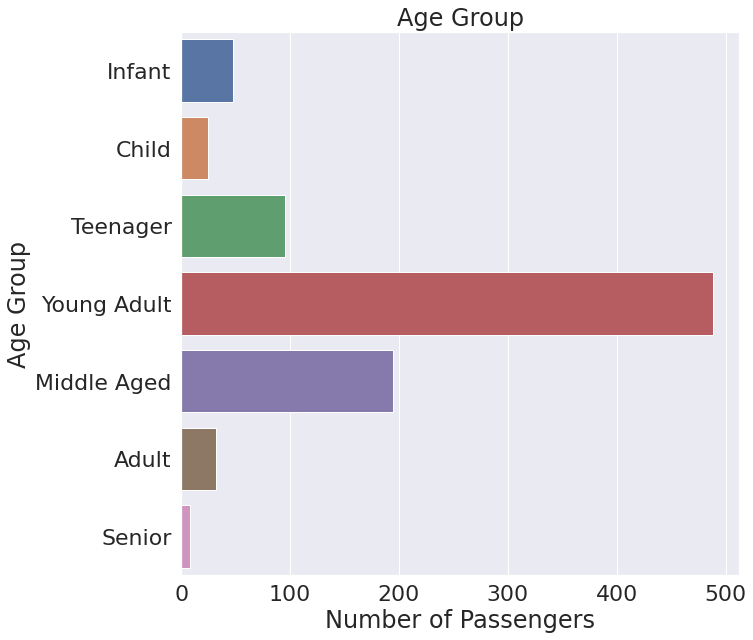

In [ ]:
plt.figure( figsize = [10, 10] )
sns.set_context("talk")
sns.set(font_scale = 2)
sns.countplot(
    y = "Age Group",
    data = df
).set(
    xlabel = "Number of Passengers",
    title = "Age Group"
)
plt.show()

Maximum number of passengers were in the age group Young Adult.

Minimum number of passengers were in the age group Senior.

**Age - Survived**

Questions : Did age play any role in survival of a passenger?

Let us apply Chi-Square test on :

$H_0$ : Age had no role in survival of a passenger vs $H_1$ : Age had a significant role in survival of a passenger

In [ ]:
age_surv = pd.crosstab(
                [df["Age Group"]],
                [df["Survived"]]
            )
chi2, p, dof, ex = stats.chi2_contingency(age_surv)
pd.DataFrame(
    data = [chi2, p],
    columns = ["Value"],
    index = ["Chi Square", "p"]
)

,Value
Chi Square,28.487952
p,0.000076


As p-value < 0.05, so we can reject $H_0$.

However for the Survival ratio, the number of passengers from each age group, who survived and died are calculated first. Then the survival ratios for each age groups are calculated and shown in the following output.

In [ ]:
survived = list()
died = list()
for group in df["Age Group"].unique() :
    survived.append(df["Age Group"][df["Age Group"] == group][df["Survived"] == "Yes"].count())
    died.append(df["Age Group"][df["Age Group"] == group][df["Survived"] == "No"].count())

pd.DataFrame(
    data = {"Survived" : survived,
            "Died" : died,
            "Survival Ratio" : [(i/j) for (i,j) in zip(survived, died)]},
    index = [i for i in df["Age Group"].unique()]
).sort_values(
    "Survival Ratio", 
    ascending = False
).style.background_gradient(
    cmap = "flag",
    axis = 0
)

,Survived,Died,Survival Ratio
Infant,33,15,2.200000
Middle Aged,85,110,0.772727
Teenager,39,56,0.696429
Child,9,16,0.562500
Adult,11,21,0.523810
Young Adult,164,324,0.506173
Senior,1,7,0.142857


Though the Survival Ratio is not decreasing monotonically with the Age Groups, but

* Infant had highest Survival Ratio

* Senior had lowest Survival Ratio

We might also get the same idea from the following plots.

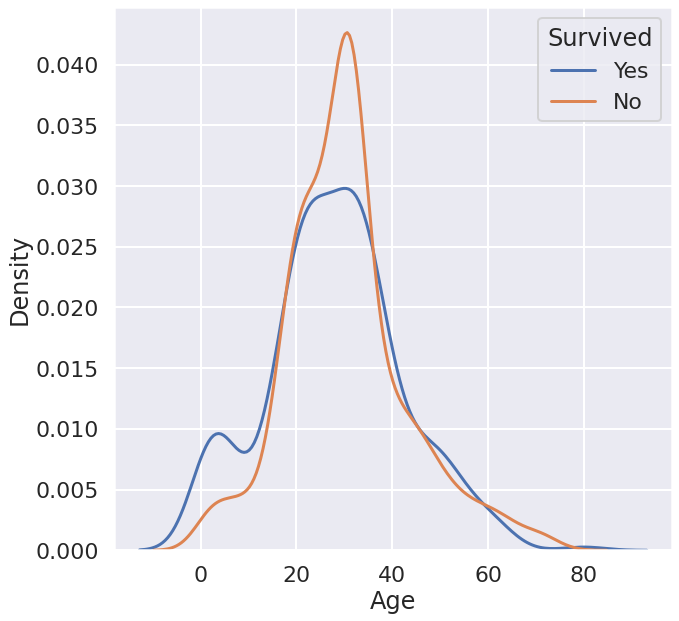

In [ ]:
plt.figure(figsize = [10,10])
sns.set_context("poster")
sns.distplot(
    a = df["Age"][df["Survived"] == "Yes"],
    hist = False,
    kde = True
)
sns.distplot(
    a = df["Age"][df["Survived"] == "No"],
    hist = False,
    kde = True
)
plt.legend(
    title = "Survived",
    labels = ["Yes", "No"]
)

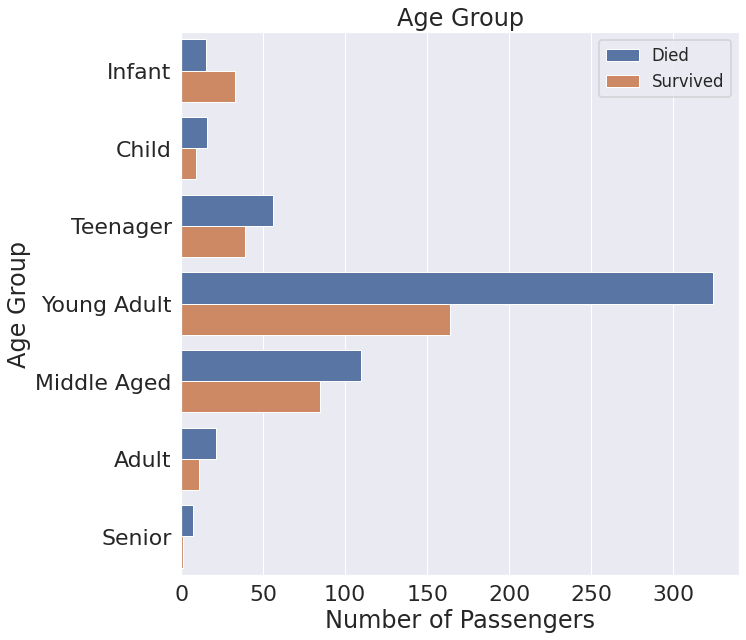

In [ ]:
plt.figure( figsize = [10, 10] )
sns.set_theme(style = "darkgrid")
sns.set(font_scale = 2)
sns.countplot(
    y = "Age Group",
    hue = "Survived",
    data = df
).set(
    xlabel = "Number of Passengers",
    title = "Age Group"
)
sns.set_context("talk")
plt.legend(labels = ["Died", "Survived"])
plt.show()

So most of the children(combining the age groups - Infant and Child) were saved.
 Age did play an important role in survival of a person.

# Age - Survived - Sex

Text(68.73297578125, 0.5, 'Age')

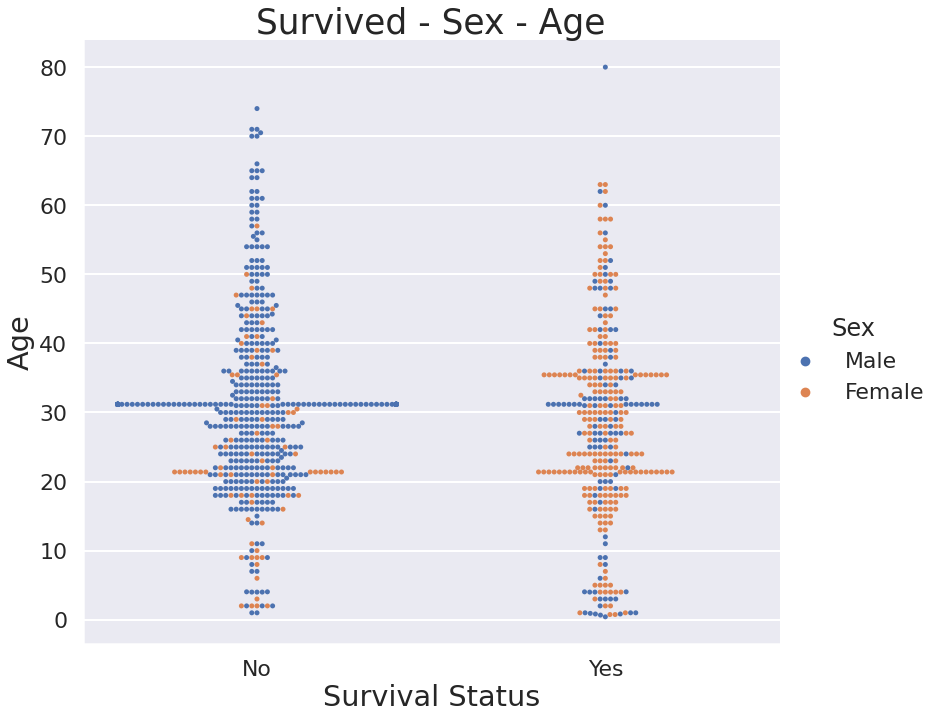

In [ ]:
sns.set_context("poster")
sns.catplot(
    x = "Survived", 
    y = "Age",
    hue = "Sex",
    data = df, 
    kind = "swarm",
    height = 10, 
    aspect = 8/7
)
plt.title(
    "Survived - Sex - Age",
    fontsize = "x-large"
)
plt.xlabel(
    "Survival Status",
    fontsize = "large"
)
plt.ylabel(
    "Age",
    fontsize = "large"
)

From the above plot, it can be seen that the senior-most passenger, who was a male, survived. The details of that passenger is shown in the following output.



In [ ]:
df[df["Age"] == max(df["Age"])]

,PassengerId,Title,FirstName,LastName,Survived,PassengerClass,Sex,Age,SiblingSpouse,ParentChild,Ticket,Fare,Embarked,Age Group
630,631,Mr,Algernon Henry Wilson,Barkworth,Yes,1st,Male,80.0,0,0,27042,30.0,Southampton,Senior


**SiblingSpouse - PassengerClass**

**Question : Were most of passenger travelling alone?**

For the above question, the number of passengers who were travelling with no Sibling/Spouse and no Parent/Child can be visualized with a graph.

Text(0, 0.5, 'Number of Passengers')

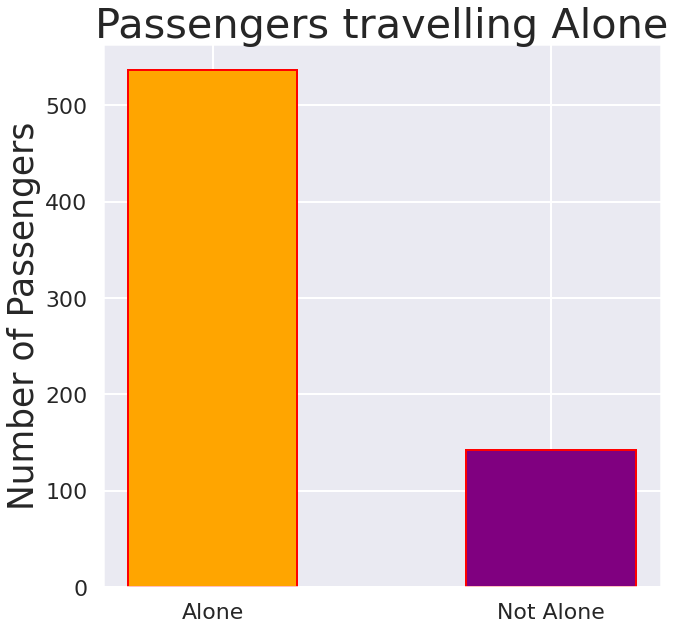

In [ ]:
alone = df["PassengerId"][df["SiblingSpouse"] == 0][df["ParentChild"] == 0].count()
not_alone = df["PassengerId"][df["SiblingSpouse"] != 0][df["ParentChild"] != 0].count()

plt.figure(figsize = [10,10])
plt.bar(
    x = ["Alone", "Not Alone"], 
    height = [alone, not_alone],
    width = [0.5, 0.5],
    color = ["orange", "purple"],
    edgecolor = "red",
    linewidth = 2
)
plt.title(
    "Passengers travelling Alone",
    fontsize = "xx-large"
)
plt.ylabel(
    "Number of Passengers",
    fontsize = "x-large"
)

So, most of the passengers were travelling alone.

Number of passengers and the proportions for each of the two cases are shown in the following table.

In [ ]:
pd.DataFrame(
    data = {"Number of Passengers" : [alone, not_alone],
             "Proportion" : [(alone/(alone+not_alone)) , (not_alone/(alone+not_alone))] },
    index = ["Alone", "With Family"]
).style.background_gradient(cmap = "gist_yarg")

,Number of Passengers,Proportion
Alone,537,0.790869
With Family,142,0.209131


**Most Passengers were travelling alone.**

**SiblingSpouse - ParentChild - Ticket - Survived**

Question : Did travelling alone affect the survival of a person?

<Figure size 2448x1512 with 0 Axes>

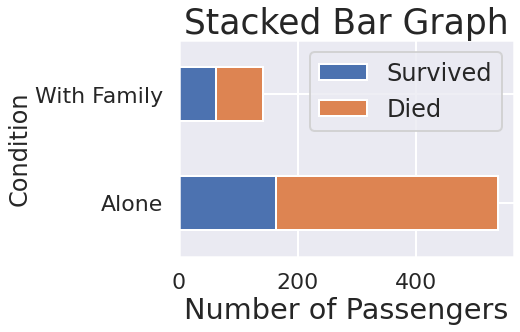

In [ ]:
alone_surv = df["Ticket"][df["Survived"] == "Yes"][df["SiblingSpouse"] == 0][df["ParentChild"] == 0].count()
alone_died = df["Ticket"][df["Survived"] == "No"][df["SiblingSpouse"] == 0][df["ParentChild"] == 0].count()
not_alone_surv = df["Ticket"][df["Survived"] == "Yes"][df["SiblingSpouse"] != 0][df["ParentChild"] != 0].count()
not_alone_died = df["Ticket"][df["Survived"] == "No"][df["SiblingSpouse"] != 0][df["ParentChild"] != 0].count()

plt.figure(figsize = [34,21])
alone_fam = pd.DataFrame(
                data = {
                    "Condition" : ["Alone", "With Family"],
                    "Survived" : [alone_surv, not_alone_surv],
                    "Died" : [alone_died, not_alone_died]
                }
            )
alone_fam.plot(
    x = "Condition",
    kind = 'barh',
    stacked = True,
    mark_right = True
)
plt.title(
    "Stacked Bar Graph",
    fontsize = "x-large"
)
plt.xlabel(
    "Number of Passengers",
    fontsize = "large"
)
plt.legend(
    fontsize = "medium"
)

In [ ]:
pd.DataFrame(
    data = {
        "Survived" : [alone_surv, not_alone_surv],
        "Died" : [alone_died, not_alone_died],
        "Survial Ratio" : [alone_surv/alone_died, not_alone_surv/not_alone_died]
    },
    index = ["Alone", "With Family"]
).style.background_gradient(cmap = "gist_yarg",axis = 1)

,Survived,Died,Survial Ratio
Alone,163,374,0.435829
With Family,62,80,0.775000


So, Survival ratio is greater in case of the group of the passengers who were travelling with family.

Last Name
Question : Can the families be displayed with the members?

The members of a family will have the same Last Name. So, here the families with the same last names will be searched from both the datasets and will be combined together in a new dataframe.

In [ ]:
family = pd.DataFrame(
    columns = df2.columns
)
for last in df["LastName"][df["SiblingSpouse"] != 0][df["ParentChild"] != 0].unique() :
    dfFam = df[df["LastName"] == last]
    df2Fam = df2[df2["LastName"] == last]    
    family = pd.concat([family, dfFam, df2Fam])

So, the "family" dataframe contains the families with their members. But, it might happen that, a passenger, who is not a part of a family, might have the same Last Name. 

So again, those passengers with no Sibling/Spouse and no Parent/Child have to be removed.

The following output will show the families with the members, whose records are present in the dataset.

In [ ]:
pd.set_option("display.max_rows", family.shape[0])
family.reset_index(inplace=True)
family = family[-((family["ParentChild"] == 0) & (family["SiblingSpouse"] == 0))]
family.drop(columns = ["index"])

,PassengerId,Title,FirstName,LastName,PassengerClass,Sex,Age,SiblingSpouse,ParentChild,Ticket,Fare,Embarked,Age Group,Survived
0,8,Master,Gosta Leonard,Palsson,3rd,Male,2.000000,3,1,349909,0.8400,Southampton,Infant,No
1,25,Miss,Torborg Danira,Palsson,3rd,Female,8.000000,3,1,349909,0.8400,Southampton,Child,No
2,375,Miss,Stina Viola,Palsson,3rd,Female,3.000000,3,1,349909,0.8400,Southampton,Infant,No
3,568,Mrs,Nils (Alma Cornelia Berglund),Palsson,3rd,Female,29.000000,0,4,349909,0.8400,Southampton,Young Adult,No
4,1281,Master,Paul Folke,Palsson,3rd,Male,6.000000,3,1,349909,21.0750,Southampton,Child,NaN
5,11,Miss,Marguerite Rut,Sandstrom,3rd,Female,4.000000,1,1,PP 9549,1.8600,Southampton,Infant,Yes
6,395,Mrs,Hjalmar (Agnes Charlotta Bengtsson),Sandstrom,3rd,Female,24.000000,0,2,PP 9549,1.8600,Southampton,Young Adult,Yes
7,1009,Miss,Beatrice Irene,Sandstrom,3rd,Female,1.000000,1,1,PP 9549,16.7000,Southampton,Infant,NaN
8,14,Mr,Anders Johan,Andersson,3rd,Male,39.000000,1,5,347082,0.6400,Southampton,Middle Aged,No
9,69,Miss,Erna Alexandra,Andersson,3rd,Female,17.000000,4,2,3101281,0.1600,Southampton,Teenager,Yes
